<a href="https://colab.research.google.com/github/JeongYoon-L/Analysis-TMDB-open-data/blob/main/cse351_project_Lee_JeongYoon_114133199.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#JeongYoon Lee(114133199)_CSE351_Summer_project

- Project #1: Movie Revenue Prediction

In [133]:
#import libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from ast import literal_eval
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
%matplotlib inline

In [134]:
#read csv file
movies_original = pd.read_csv('tmdb_5000_movies.csv')
credits_original = pd.read_csv('tmdb_5000_credits.csv')



In [3]:
#check shape
movies_original.shape

(4803, 20)

In [4]:
#check shape
credits_original.shape

(4803, 4)

In [5]:
#check duplicated id
display(movies_original[movies_original.duplicated("id")])

Empty DataFrame
Columns: [budget, genres, homepage, id, keywords, original_language, original_title, overview, popularity, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, status, tagline, title, vote_average, vote_count]
Index: []

In [6]:
#check duplicated id
display(credits_original[credits_original.duplicated("movie_id")])

Empty DataFrame
Columns: [movie_id, title, cast, crew]
Index: []

In [135]:
credits_original.rename(columns = {'movie_id' : 'id'}, inplace = True)
credits_original = credits_original.drop(columns = 'title')
credits_original.head()


id  ...                                               crew
0   19995  ...  [{"credit_id": "52fe48009251416c750aca23", "de...
1     285  ...  [{"credit_id": "52fe4232c3a36847f800b579", "de...
2  206647  ...  [{"credit_id": "54805967c3a36829b5002c41", "de...
3   49026  ...  [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4   49529  ...  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

[5 rows x 3 columns]

In [136]:
movies_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [137]:
credits_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4803 non-null   int64 
 1   cast    4803 non-null   object
 2   crew    4803 non-null   object
dtypes: int64(1), object(2)
memory usage: 112.7+ KB


In [138]:
#merge(left join) with two csv file
data = pd.merge(left = movies_original, right = credits_original, how = "left" , on = "id")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [139]:
#check the number of null value for each columns.
data.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

In [140]:
#fill "NaN" to null value in homepage, overview, tagline columns
data["homepage"] = data["homepage"].fillna("NaN")
data["overview"] = data["overview"].fillna("NaN")
data["tagline"] = data["tagline"].fillna("NaN")

#check the number of null value for each columns.
data.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

In [141]:
data[data["release_date"].isnull()]

budget genres homepage      id  ... vote_average vote_count cast crew
4553       0     []      NaN  380097  ...          0.0          0   []   []

[1 rows x 22 columns]

When I searched this movie to the "themoviedb.org", and there's no such data for this movie.
So I decided remove this row since there are no any information about this movie in the website also any columns.


In [142]:
drop_row = data[data['release_date'].isnull()].index
data = data.drop( drop_row )
data[data["release_date"].isnull()]

Empty DataFrame
Columns: [budget, genres, homepage, id, keywords, original_language, original_title, overview, popularity, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, status, tagline, title, vote_average, vote_count, cast, crew]
Index: []

In [143]:
runtime_null  = data[data["runtime"].isnull()]
runtime_null[['title','runtime']]

title  runtime
2656  Chiamatemi Francesco - Il Papa della gente      NaN
4140                 To Be Frank, Sinatra at 100      NaN

For the movie "Chiamatemi Francesco - Il Papa della gente" which its runtime is null value, we can find that the real runtime for this movie is 1h38m through the tmdb website.
https://www.themoviedb.org/movie/370980-chiamatemi-francesco


In [144]:
data.at[2656, 'runtime'] = 98
data.loc[2656]

budget                                                           15000000
genres                                      [{"id": 18, "name": "Drama"}]
homepage                                                              NaN
id                                                                 370980
keywords                [{"id": 717, "name": "pope"}, {"id": 5565, "na...
original_language                                                      it
original_title                 Chiamatemi Francesco - Il Papa della gente
overview                                                              NaN
popularity                                                       0.738646
production_companies               [{"name": "Taodue Film", "id": 45724}]
production_countries              [{"iso_3166_1": "IT", "name": "Italy"}]
release_date                                                   2015-12-03
revenue                                                                 0
runtime                               

In [145]:
data[data["runtime"].isnull()]

budget  ...                                               crew
4140       2  ...  [{"credit_id": "592b25e4c3a368783e065a2f", "de...

[1 rows x 22 columns]

For the movie "To Be Frank, Sinatra at 100" which its runtime is null value, we can find that the real runtime for this movie is 1h21m through the tmdb website. https://www.themoviedb.org/movie/459488-to-be-frank-sinatra-at-100

In [146]:
data.at[4140, 'runtime'] = 81
data.loc[4140]

budget                                                                  2
genres                                [{"id": 99, "name": "Documentary"}]
homepage                                                              NaN
id                                                                 459488
keywords                [{"id": 6027, "name": "music"}, {"id": 225822,...
original_language                                                      en
original_title                                To Be Frank, Sinatra at 100
overview                                                              NaN
popularity                                                       0.050625
production_companies     [{"name": "Eyeline Entertainment", "id": 60343}]
production_countries     [{"iso_3166_1": "GB", "name": "United Kingdom"}]
release_date                                                   2015-12-12
revenue                                                                 0
runtime                               

In [147]:
data[(data['title'] == "To Be Frank, Sinatra at 100") | (data['title'] == "Chiamatemi Francesco - Il Papa della gente")][['title','runtime']]

title  runtime
2656  Chiamatemi Francesco - Il Papa della gente     98.0
4140                 To Be Frank, Sinatra at 100     81.0

In [148]:
data[(data['revenue'] ==0)]

budget  ...                                               crew
83     27000000  ...  [{"credit_id": "52fe49e0c3a368484e145067", "de...
135   150000000  ...  [{"credit_id": "538aeb0a0e0a266718000fc2", "de...
265           0  ...  [{"credit_id": "52fe438d9251416c75014d95", "de...
309    84000000  ...  [{"credit_id": "52fe43439251416c75009b91", "de...
376    90000000  ...  [{"credit_id": "52fe435f9251416c7500dded", "de...
...         ...  ...                                                ...
4797          0  ...  [{"credit_id": "52fe475dc3a368484e0c319f", "de...
4799       9000  ...  [{"credit_id": "52fe487dc3a368484e0fb013", "de...
4800          0  ...  [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...
4801          0  ...  [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...
4802          0  ...  [{"credit_id": "58ce021b9251415a390165d9", "de...

[1426 rows x 22 columns]

- I found that almost dataset which have revenue as 0 value, don't have any information in the TMDB website.
- I think they have some problem while scrapping those data. It should be NaN instead of 0.
- For this analysis, the revenue will be very important features, so I will remove rows that has 0 revenue.


In [149]:
#############################Question!!!############################
data_revenue_zero = data[data['revenue']== 0].index
data_with_revenue = data.drop(data_revenue_zero)
data_with_revenue

budget  ...                                               crew
0     237000000  ...  [{"credit_id": "52fe48009251416c750aca23", "de...
1     300000000  ...  [{"credit_id": "52fe4232c3a36847f800b579", "de...
2     245000000  ...  [{"credit_id": "54805967c3a36829b5002c41", "de...
3     250000000  ...  [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4     260000000  ...  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
...         ...  ...                                                ...
4775          0  ...  [{"credit_id": "52fe45309251416c9102a535", "de...
4788      12000  ...  [{"credit_id": "52fe426bc3a36847f801d203", "de...
4792      20000  ...  [{"credit_id": "52fe45cc9251416c9103eb7b", "de...
4796       7000  ...  [{"credit_id": "52fe45e79251416c75066791", "de...
4798     220000  ...  [{"credit_id": "52fe44eec3a36847f80b280b", "de...

[3376 rows x 22 columns]

In [150]:
data_with_revenue[(data_with_revenue['budget'] ==0)]

budget  ...                                               crew
321        0  ...  [{"credit_id": "587ea5eb9251413f1b02b874", "de...
359        0  ...  [{"credit_id": "565c2c3f9251416919007486", "de...
409        0  ...  [{"credit_id": "52fe46f09251416c750888a1", "de...
475        0  ...  [{"credit_id": "52fe44f6c3a36847f80b48a3", "de...
489        0  ...  [{"credit_id": "54186c670e0a2637f900366f", "de...
...      ...  ...                                                ...
4605       0  ...  [{"credit_id": "53e7e510c3a368399f00231e", "de...
4630       0  ...  [{"credit_id": "57e7aeb49251412ae301058d", "de...
4677       0  ...  [{"credit_id": "52fe485bc3a36847f816358d", "de...
4766       0  ...  [{"credit_id": "52fe45bb9251416c75060907", "de...
4775       0  ...  [{"credit_id": "52fe45309251416c9102a535", "de...

[147 rows x 22 columns]

In [151]:
#############################Question!!!############################
data_revenue_zero = data_with_revenue[data_with_revenue['budget']== 0].index
data_with_revenue = data_with_revenue.drop(data_revenue_zero)
data_with_revenue

budget  ...                                               crew
0     237000000  ...  [{"credit_id": "52fe48009251416c750aca23", "de...
1     300000000  ...  [{"credit_id": "52fe4232c3a36847f800b579", "de...
2     245000000  ...  [{"credit_id": "54805967c3a36829b5002c41", "de...
3     250000000  ...  [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4     260000000  ...  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
...         ...  ...                                                ...
4773      27000  ...  [{"credit_id": "52fe434ac3a36847f8049253", "de...
4788      12000  ...  [{"credit_id": "52fe426bc3a36847f801d203", "de...
4792      20000  ...  [{"credit_id": "52fe45cc9251416c9103eb7b", "de...
4796       7000  ...  [{"credit_id": "52fe45e79251416c75066791", "de...
4798     220000  ...  [{"credit_id": "52fe44eec3a36847f80b280b", "de...

[3229 rows x 22 columns]

In [152]:
data[['genres','keywords','production_companies', 'production_countries', 'spoken_languages','cast', 'crew']]

genres  ...                                               crew
0     [{"id": 28, "name": "Action"}, {"id": 12, "nam...  ...  [{"credit_id": "52fe48009251416c750aca23", "de...
1     [{"id": 12, "name": "Adventure"}, {"id": 14, "...  ...  [{"credit_id": "52fe4232c3a36847f800b579", "de...
2     [{"id": 28, "name": "Action"}, {"id": 12, "nam...  ...  [{"credit_id": "54805967c3a36829b5002c41", "de...
3     [{"id": 28, "name": "Action"}, {"id": 80, "nam...  ...  [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4     [{"id": 28, "name": "Action"}, {"id": 12, "nam...  ...  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
...                                                 ...  ...                                                ...
4798  [{"id": 28, "name": "Action"}, {"id": 80, "nam...  ...  [{"credit_id": "52fe44eec3a36847f80b280b", "de...
4799  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...  ...  [{"credit_id": "52fe487dc3a368484e0fb013", "de...
4800  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...  ...  [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...
4801                                                 []  ...  [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...
4802                [{"id": 99, "name": "Documentary"}]  ...  [{"credit_id": "58ce021b9251415a390165d9", "de...

[4802 rows x 7 columns]

In [153]:
#make dict to list
data_with_revenue['genres']=data_with_revenue['genres'].apply(literal_eval)
data_with_revenue['genres']=data_with_revenue['genres'].apply(lambda x : [y['name'] for y in x] )

data_with_revenue['keywords']=data_with_revenue['keywords'].apply(literal_eval)
data_with_revenue['keywords']=data_with_revenue['keywords'].apply(lambda x : [y['name'] for y in x] )

data_with_revenue['production_companies']=data_with_revenue['production_companies'].apply(literal_eval)
data_with_revenue['production_companies']=data_with_revenue['production_companies'].apply(lambda x : [y['name'] for y in x] )

data_with_revenue['production_countries']=data_with_revenue['production_countries'].apply(literal_eval)
data_with_revenue['production_countries']=data_with_revenue['production_countries'].apply(lambda x : [y['name'] for y in x] )

data_with_revenue['spoken_languages']=data_with_revenue['spoken_languages'].apply(literal_eval)
data_with_revenue['spoken_languages']=data_with_revenue['spoken_languages'].apply(lambda x : [y['iso_639_1'] for y in x] )

data_with_revenue['cast']=data_with_revenue['cast'].apply(literal_eval)
data_with_revenue['cast']=data_with_revenue['cast'].apply(lambda x : [y['name'] for y in x] )

data_with_revenue['crew']=data_with_revenue['crew'].apply(literal_eval)
data_with_revenue['crew']=data_with_revenue['crew'].apply(lambda x : [y['name'] for y in x] )

In [154]:
data_with_revenue[['genres','keywords','production_companies', 'production_countries', 'spoken_languages','cast', 'crew']]

genres  ...                                               crew
0     [Action, Adventure, Fantasy, Science Fiction]  ...  [Stephen E. Rivkin, Rick Carter, Christopher B...
1                      [Adventure, Fantasy, Action]  ...  [Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...
2                        [Action, Adventure, Crime]  ...  [Thomas Newman, Sam Mendes, Anna Pinnock, John...
3                  [Action, Crime, Drama, Thriller]  ...  [Hans Zimmer, Charles Roven, Christopher Nolan...
4              [Action, Adventure, Science Fiction]  ...  [Andrew Stanton, Andrew Stanton, John Lasseter...
...                                             ...  ...                                                ...
4773                                       [Comedy]  ...  [Kevin Smith, Kevin Smith, Kevin Smith, Kevin ...
4788                        [Horror, Comedy, Crime]  ...  [John Waters, John Waters, John Waters, John W...
4792             [Crime, Horror, Mystery, Thriller]  ...               [Kiyoshi Kurosawa, Kiyoshi Kurosawa]
4796             [Science Fiction, Drama, Thriller]  ...  [Shane Carruth, Shane Carruth, Shane Carruth, ...
4798                      [Action, Crime, Thriller]  ...  [Robert Rodriguez, Robert Rodriguez, Robert Ro...

[3229 rows x 7 columns]

In [155]:
data_with_revenue.head()

budget  ...                                               crew
0  237000000  ...  [Stephen E. Rivkin, Rick Carter, Christopher B...
1  300000000  ...  [Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...
2  245000000  ...  [Thomas Newman, Sam Mendes, Anna Pinnock, John...
3  250000000  ...  [Hans Zimmer, Charles Roven, Christopher Nolan...
4  260000000  ...  [Andrew Stanton, Andrew Stanton, John Lasseter...

[5 rows x 22 columns]

In [156]:
data_with_revenue['num_of_genres'] = data_with_revenue["genres"].apply(lambda x: len(x) if x != {} else 0)
data_with_revenue['num_of_keywords'] = data_with_revenue["keywords"].apply(lambda x: len(x) if x != {} else 0)
data_with_revenue['num_of_production_companies'] = data_with_revenue["production_companies"].apply(lambda x: len(x) if x != {} else 0)
data_with_revenue['num_of_production_countries'] = data_with_revenue["production_countries"].apply(lambda x: len(x) if x != {} else 0)
data_with_revenue['num_of_spoken_languages'] = data_with_revenue["spoken_languages"].apply(lambda x: len(x) if x != {} else 0)
data_with_revenue['num_of_cast'] = data_with_revenue["cast"].apply(lambda x: len(x) if x != {} else 0)
data_with_revenue['num_of_crew'] = data_with_revenue["crew"].apply(lambda x: len(x) if x != {} else 0)

data_with_revenue.head()

budget  ... num_of_crew
0  237000000  ...         153
1  300000000  ...          32
2  245000000  ...         155
3  250000000  ...         217
4  260000000  ...         132

[5 rows x 29 columns]

In [157]:
####################################Question!###########################
data_with_revenue[(data_with_revenue['num_of_genres'] ==0) | (data_with_revenue['num_of_keywords'] ==0) |(data_with_revenue['num_of_production_companies'] ==0) |	(data_with_revenue['num_of_production_countries'] ==0) |	(data_with_revenue['num_of_spoken_languages'] ==0) |	(data_with_revenue['num_of_cast']==0) |	(data_with_revenue['num_of_crew']==0)]

budget                        genres  ... num_of_cast  num_of_crew
71    145000000  [Adventure, Action, Fantasy]  ...          15           17
272    90000000             [Comedy, Romance]  ...          10            3
323   100000000      [Comedy, Drama, Romance]  ...          32           14
381    90000000     [Fantasy, Action, Family]  ...          12            3
436    80000000                      [Comedy]  ...          55           17
...         ...                           ...  ...         ...          ...
4632     250000      [Comedy, Drama, Romance]  ...          16            2
4641        250    [Drama, Comedy, Animation]  ...           3            2
4661     245000         [Drama, Romance, War]  ...          11           10
4668     100000                      [Comedy]  ...          15            1
4772      31192       [Drama, Action, Comedy]  ...           9            3

[133 rows x 29 columns]

In [158]:
data_with_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   budget                       3229 non-null   int64  
 1   genres                       3229 non-null   object 
 2   homepage                     3229 non-null   object 
 3   id                           3229 non-null   int64  
 4   keywords                     3229 non-null   object 
 5   original_language            3229 non-null   object 
 6   original_title               3229 non-null   object 
 7   overview                     3229 non-null   object 
 8   popularity                   3229 non-null   float64
 9   production_companies         3229 non-null   object 
 10  production_countries         3229 non-null   object 
 11  release_date                 3229 non-null   object 
 12  revenue                      3229 non-null   int64  
 13  runtime           

#Count the number of movies released by day of week, month and year, are there any patterns that you observe?

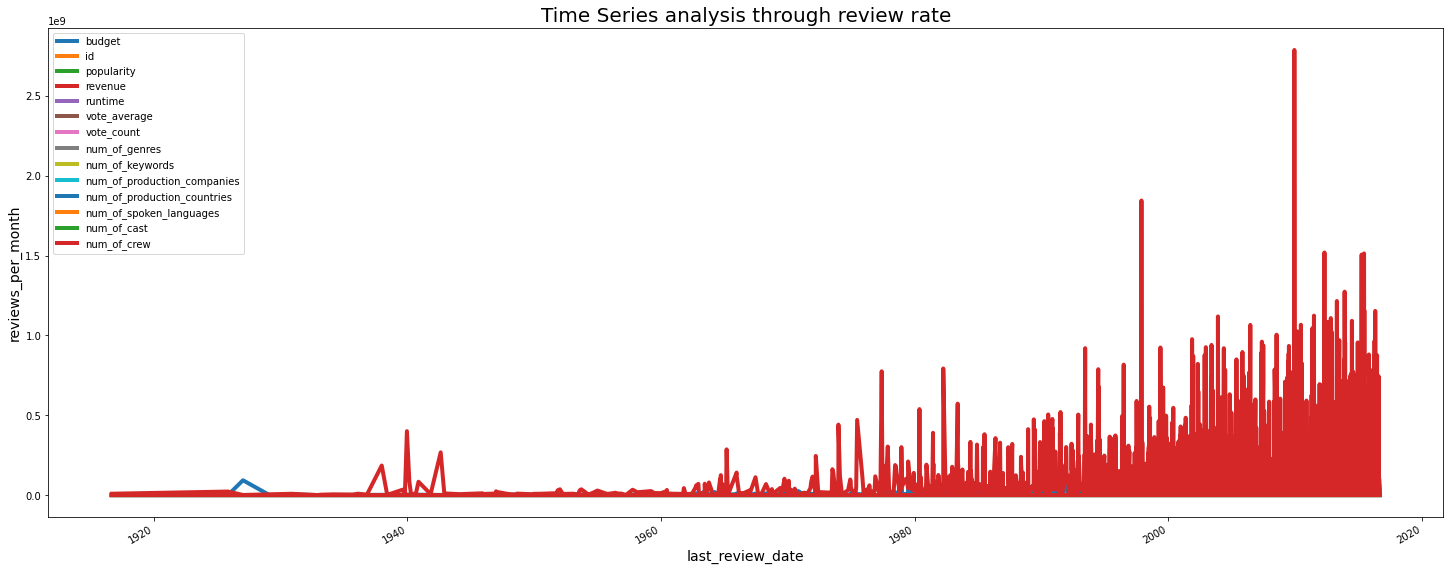

In [ ]:
###################################################삭제#####################################
data_day = data_with_revenue.copy()

data_day1 = data_with_revenue.copy()

data_day = pd.to_datetime(data_day['release_date'])
datetime_index = pd.DatetimeIndex(data_day.values)
data_day = data_day1.set_index(datetime_index)


data_day.plot(figsize = (25,10),linewidth = 4)

plt.title('Time Series analysis through review rate', fontsize=20)

plt.xlabel('last_review_date', fontsize=14)

plt.ylabel('reviews_per_month', fontsize=14)

plt.show()

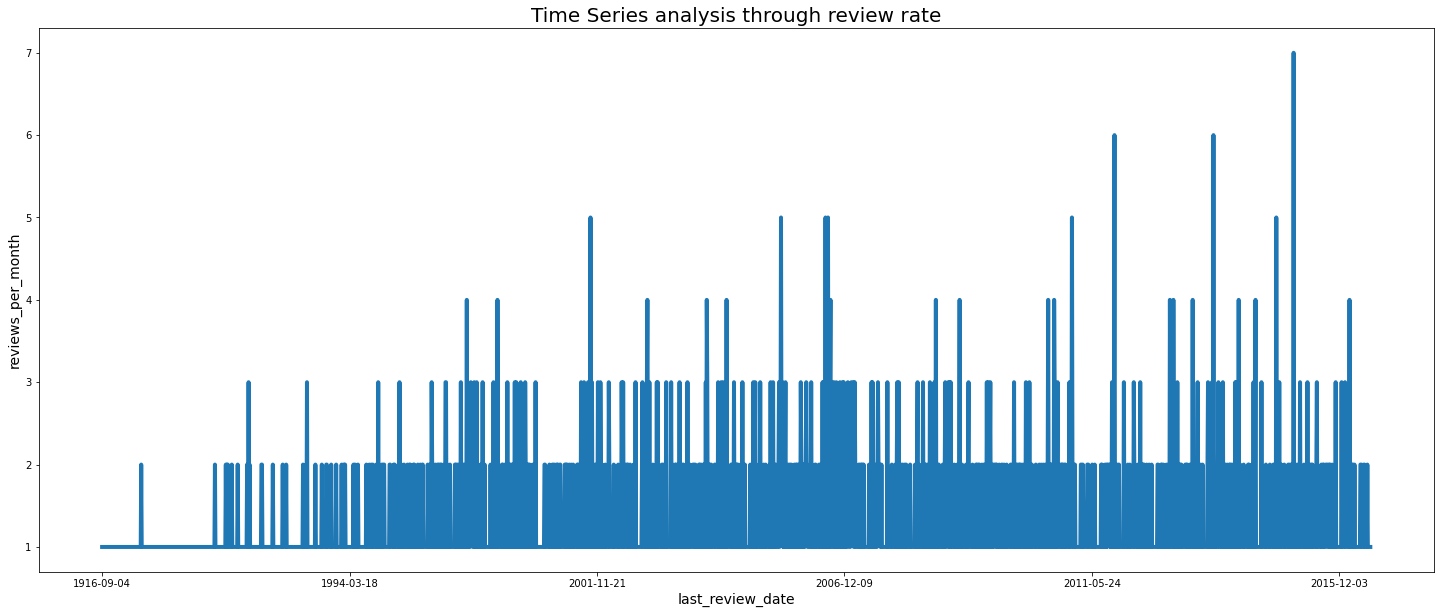

In [29]:
data_day = data_with_revenue.copy()
data_day = data_day.groupby(['release_date']).size()
data_day

data_day.plot(figsize = (25,10),linewidth = 4)
plt.title('Time Series analysis through review rate', fontsize=20)

plt.xlabel('last_review_date', fontsize=14)

plt.ylabel('reviews_per_month', fontsize=14)

plt.show()

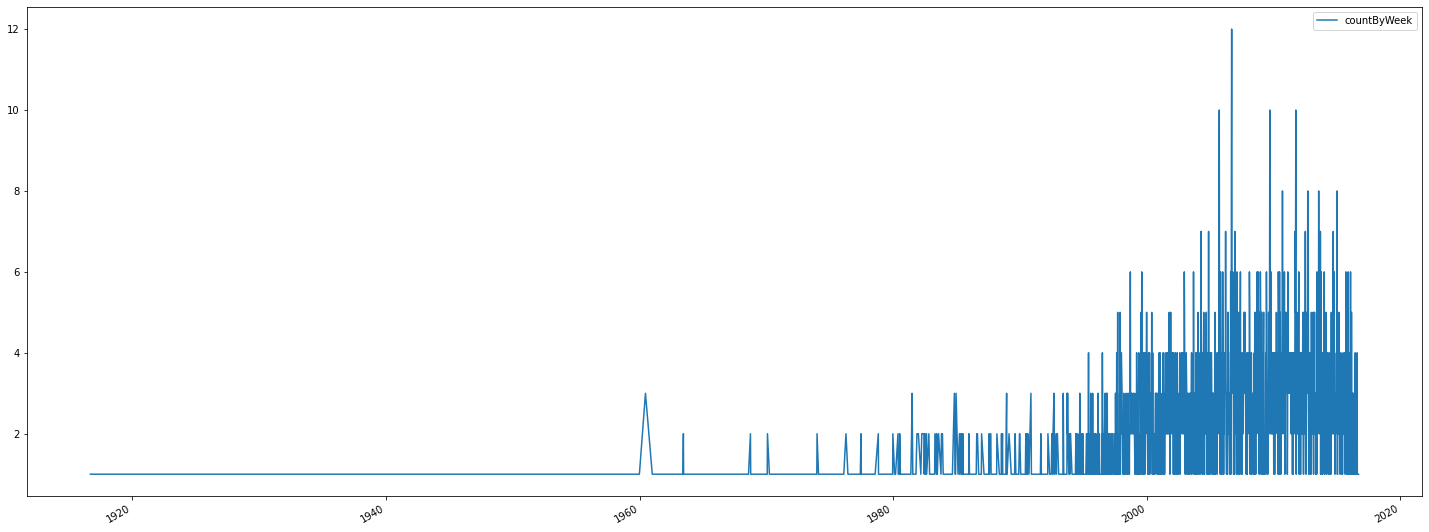

In [30]:
data_day = data_with_revenue.copy()
data_day = data_day.groupby(['release_date']).size()

data_day = pd.DataFrame(data_day, columns=['countByWeek'])
df_time = pd.to_datetime(data_day.index)
datetime_index = pd.DatetimeIndex(df_time.values) 
data_day = data_day.set_index(datetime_index)

data_day
#Resample the dataframe
data_day = data_day.resample('1W').sum()

drop_row_week = data_day[data_day['countByWeek']==0].index
data_day = data_day.drop( drop_row_week )

data_day
#You can plot the chart by adding .plot()
# data_day.plot(kind = 'bar' ,figsize = (25,10))
data_day.plot(figsize = (25,10))


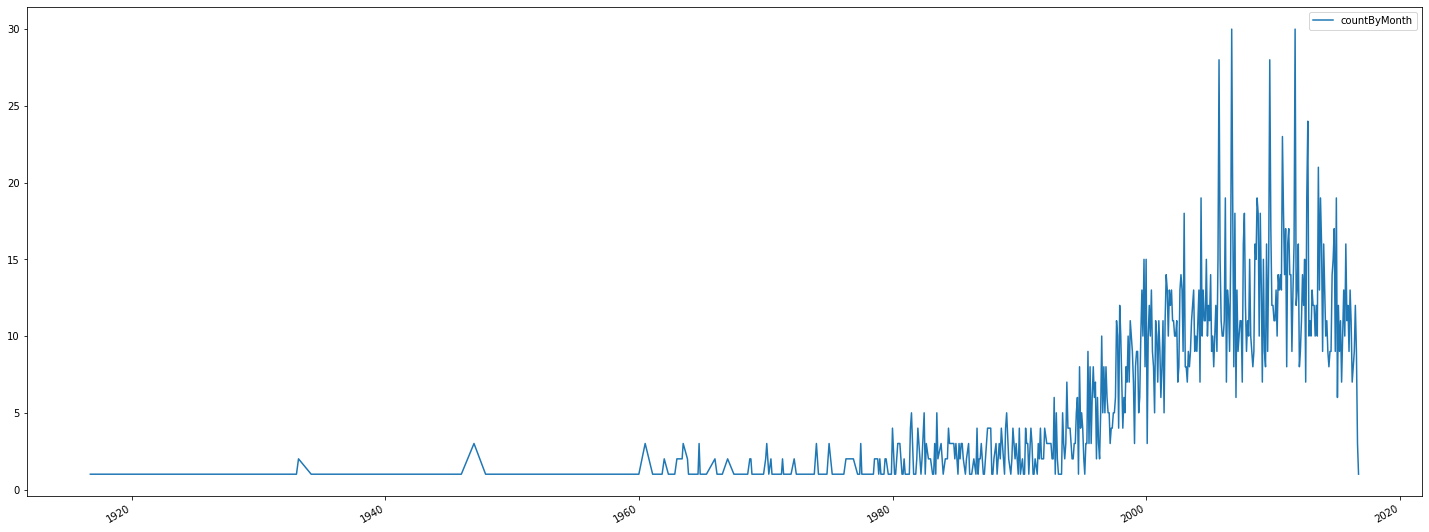

In [ ]:
data_day = data_with_revenue.copy()
data_day = data_day.groupby(['release_date']).size()

data_day = pd.DataFrame(data_day, columns=['countByMonth'])
df_time = pd.to_datetime(data_day.index)
datetime_index = pd.DatetimeIndex(df_time.values) 
data_day = data_day.set_index(datetime_index)

data_day
#Resample the dataframe
data_day = data_day.resample('1M').sum()

drop_row_week = data_day[data_day['countByMonth']==0].index
data_day = data_day.drop( drop_row_week )

data_day
#You can plot the chart by adding .plot()
# data_day.plot(kind = 'bar' ,figsize = (25,10))
data_day.plot(figsize = (25,10))


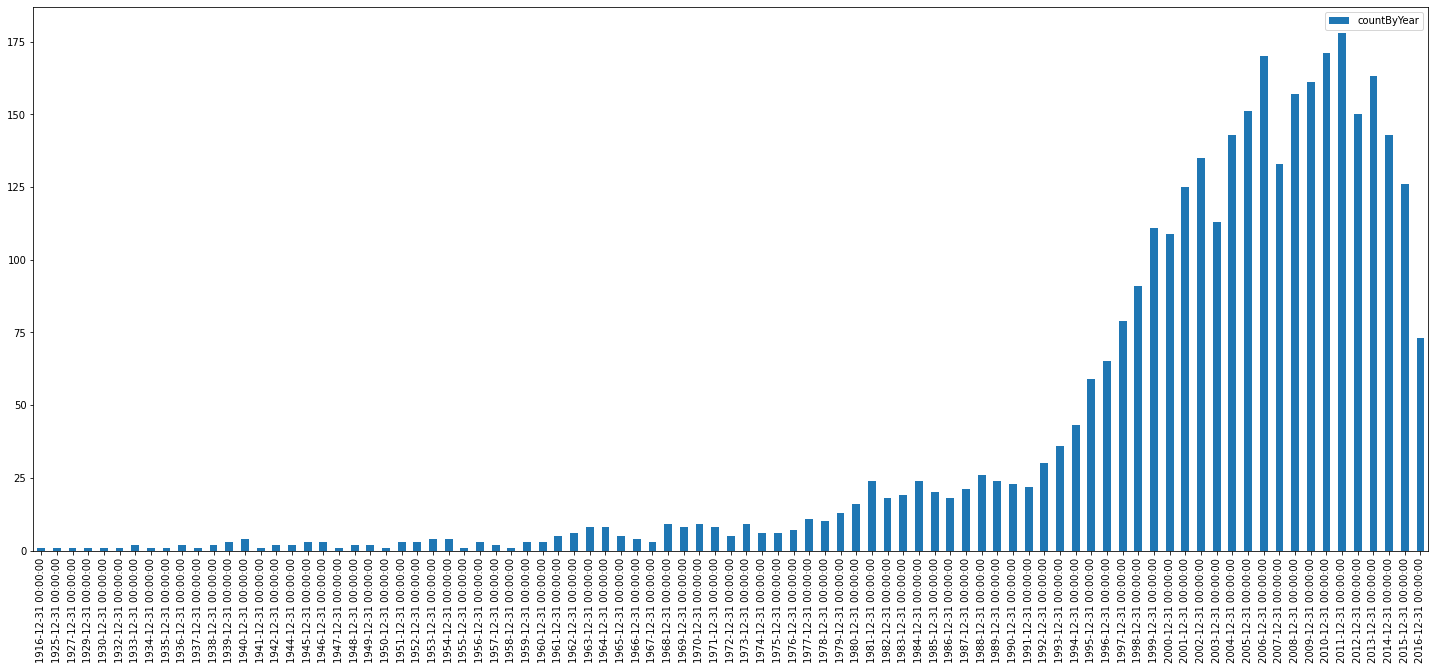

In [ ]:
data_day = data_with_revenue.copy()
data_day = data_day.groupby(['release_date']).size()

data_day = pd.DataFrame(data_day, columns=['countByYear'])
df_time = pd.to_datetime(data_day.index)
datetime_index = pd.DatetimeIndex(df_time.values) 
data_day = data_day.set_index(datetime_index)

data_day
#Resample the dataframe
data_day = data_day.resample('1Y').sum()

drop_row_week = data_day[data_day['countByYear']==0].index
data_day = data_day.drop( drop_row_week )

data_day
#You can plot the chart by adding .plot()
data_day.plot(kind = 'bar' ,figsize = (25,10))
# data_day.plot(figsize = (25,10))


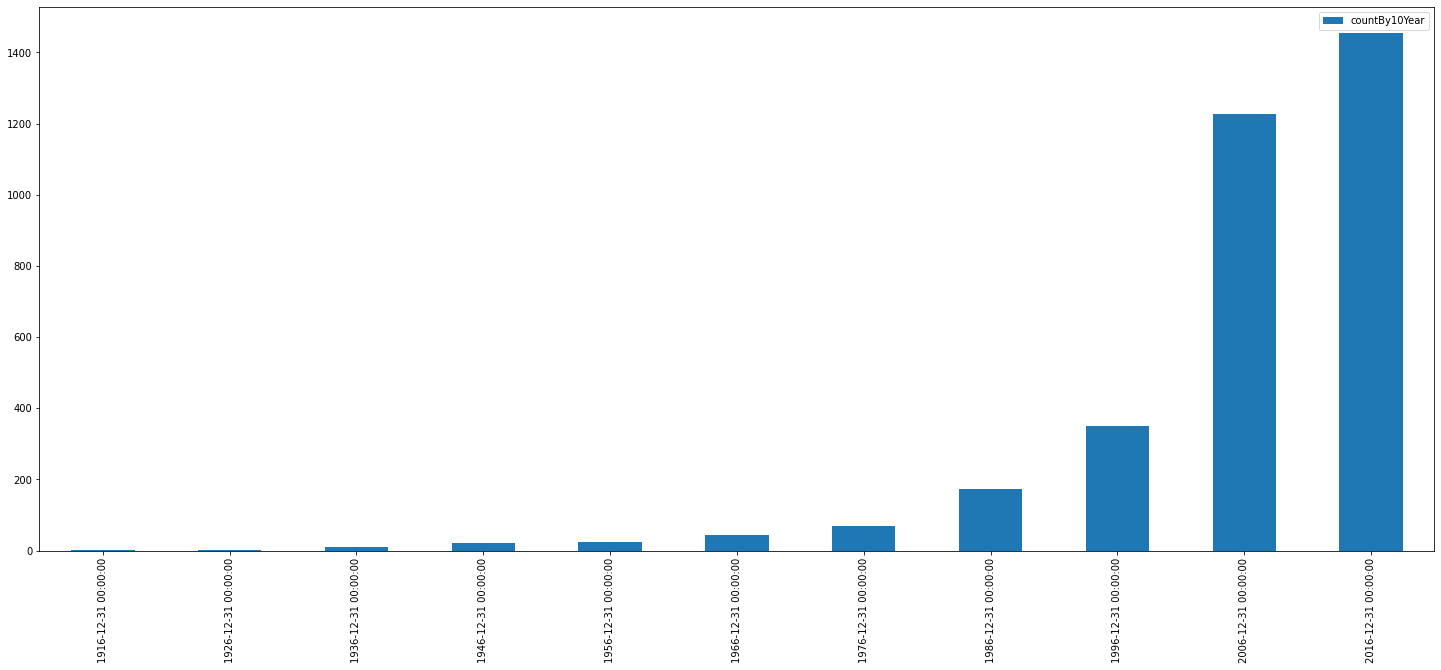

In [ ]:
data_day = data_with_revenue.copy()
data_day = data_day.groupby(['release_date']).size()

data_day = pd.DataFrame(data_day, columns=['countBy10Year'])
df_time = pd.to_datetime(data_day.index)
datetime_index = pd.DatetimeIndex(df_time.values) 
data_day = data_day.set_index(datetime_index)

data_day
#Resample the dataframe
data_day = data_day.resample('10Y').sum()

drop_row_week = data_day[data_day['countBy10Year']==0].index
data_day = data_day.drop( drop_row_week )

data_day
#You can plot the chart by adding .plot()
data_day.plot(kind = 'bar' ,figsize = (25,10))
# data_day.plot(figsize = (25,10))


In [31]:
genre_1910 = data_with_revenue[data_with_revenue['release_date'].str.startswith("191")]
genre_1920 = data_with_revenue[data_with_revenue['release_date'].str.startswith("192")]
genre_1930 = data_with_revenue[data_with_revenue['release_date'].str.startswith("193")]
genre_1940 = data_with_revenue[data_with_revenue['release_date'].str.startswith("194")]
genre_1950 = data_with_revenue[data_with_revenue['release_date'].str.startswith("195")]
genre_1960 = data_with_revenue[data_with_revenue['release_date'].str.startswith("196")]
genre_1970 = data_with_revenue[data_with_revenue['release_date'].str.startswith("197")]
genre_1980 = data_with_revenue[data_with_revenue['release_date'].str.startswith("198")]
genre_1990 = data_with_revenue[data_with_revenue['release_date'].str.startswith("199")]
genre_2000 = data_with_revenue[data_with_revenue['release_date'].str.startswith("200")]
genre_2010 = data_with_revenue[data_with_revenue['release_date'].str.startswith("201")]

(-0.5, 1199.5, 999.5, -0.5)

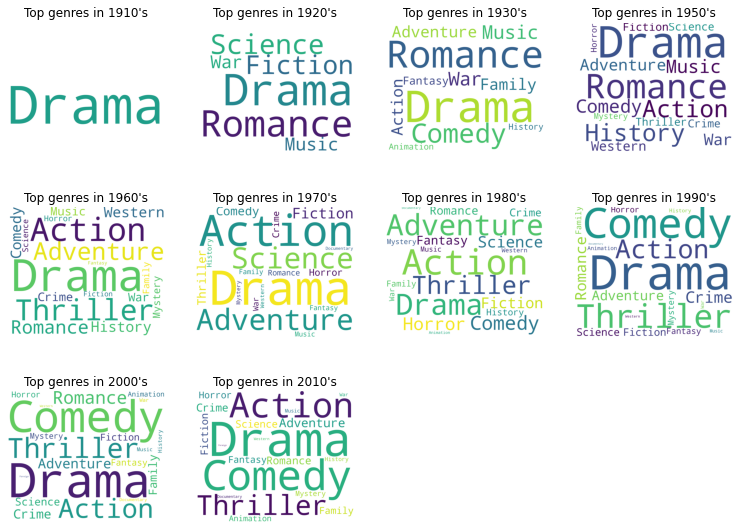

In [32]:
fig=plt.figure(figsize = (13,13))
rows = 4
cols = 4
axes=[]


list_of_genre_1910 = list(genre_1910["genres"])
text = " ".join([i for j in list_of_genre_1910 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 1)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1910's") 
plt1.axis("off") 

list_of_genre_1920 = list(genre_1920["genres"])
text = " ".join([i for j in list_of_genre_1920 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 2)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1920's") 
plt1.axis("off") 

list_of_genre_1930 = list(genre_1930["genres"])
text = " ".join([i for j in list_of_genre_1930 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 3)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1930's") 
plt1.axis("off") 

list_of_genre_1940 = list(genre_1940["genres"])
text = " ".join([i for j in list_of_genre_1940 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 4)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1940's") 
plt1.axis("off") 

list_of_genre_1950 = list(genre_1950["genres"])
text = " ".join([i for j in list_of_genre_1950 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 4)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1950's") 
plt1.axis("off") 

list_of_genre_1960 = list(genre_1960["genres"])
text = " ".join([i for j in list_of_genre_1960 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 5)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1960's") 
plt1.axis("off") 

list_of_genre_1970 = list(genre_1970["genres"])
text = " ".join([i for j in list_of_genre_1970 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 6)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1970's") 
plt1.axis("off") 

list_of_genre_1980 = list(genre_1980["genres"])
text = " ".join([i for j in list_of_genre_1980 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 7)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1980's") 
plt1.axis("off") 

list_of_genre_1990 = list(genre_1990["genres"])
text = " ".join([i for j in list_of_genre_1990 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 8)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1990's") 
plt1.axis("off") 

list_of_genre_2000 = list(genre_2000["genres"])
text = " ".join([i for j in list_of_genre_2000 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 9)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 2000's") 
plt1.axis("off") 

list_of_genre_2010 = list(genre_2010["genres"])
text = " ".join([i for j in list_of_genre_2010 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 10)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 2010's") 
plt1.axis("off") 


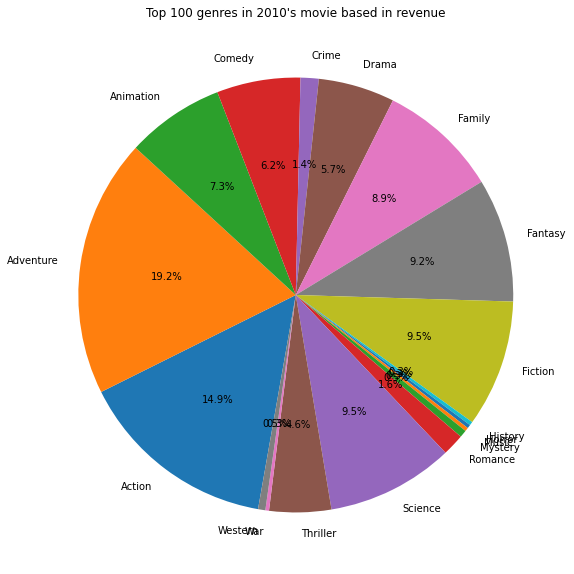

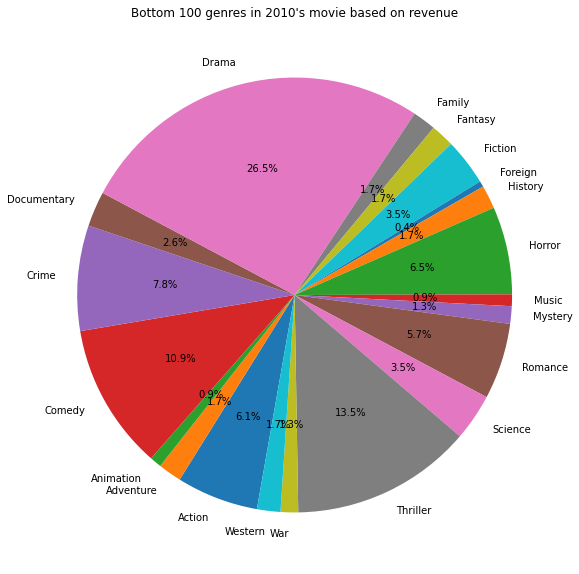

In [33]:
highest_revenue_movies = genre_2010.sort_values(by = 'revenue', ascending = False)[:100]
highest_revenue_movies = list(highest_revenue_movies["genres"])
text = " ".join([i for j in highest_revenue_movies for i in j])

wordCount = {} 
wordList = text.split()
word_freq_highest = pd.DataFrame( columns=['word', 'num'])
for word in wordList:
    wordCount[word] = wordCount.get(word, 0) + 1 
    keys = sorted(wordCount.keys())
 
for word in keys:
  word_freq_highest = word_freq_highest.append(pd.DataFrame([[word,wordCount[word]]], columns=['word', 'num']))

lowest_revenue_movies = genre_2010.sort_values(by = 'revenue', ascending = True)[:100]
lowest_revenue_movies = list(lowest_revenue_movies["genres"])
text = " ".join([i for j in lowest_revenue_movies for i in j])

wordCount = {} 
wordList = text.split()
word_freq_lowest = pd.DataFrame( columns=['word', 'num'])
for word in wordList:
    wordCount[word] = wordCount.get(word, 0) + 1 
    keys = sorted(wordCount.keys())
 
for word in keys:
  word_freq_lowest = word_freq_lowest.append(pd.DataFrame([[word,wordCount[word]]], columns=['word', 'num']))




plt.figure(figsize = (10,10))
plt.title("Top 100 genres in 2010's movie based in revenue")
plt.pie(word_freq_highest['num'], labels = word_freq_highest['word'], autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()


plt.figure(figsize = (10,10))
plt.title("Bottom 100 genres in 2010's movie based on revenue")
plt.pie(word_freq_lowest['num'], labels = word_freq_lowest['word'], autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

#correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff459edc10>,
      dtype=object)

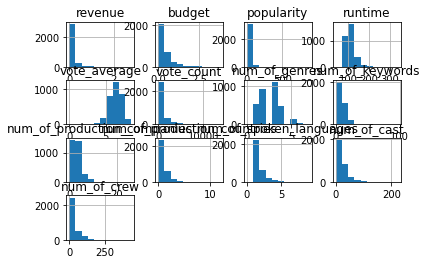

In [159]:
data_continuous = data_with_revenue[['revenue','budget','popularity','runtime','vote_average','vote_count','num_of_genres', 'num_of_keywords','num_of_production_companies','num_of_production_countries','num_of_spoken_languages','num_of_cast','num_of_crew' ]]

data_continuous.hist()


# transformer = MinMaxScaler()

# transformer.fit(data_continuous)
# data_continuous[:] = transformer.fit_transform(data_continuous[:])
# data_continuous

# #result
# data_continuous



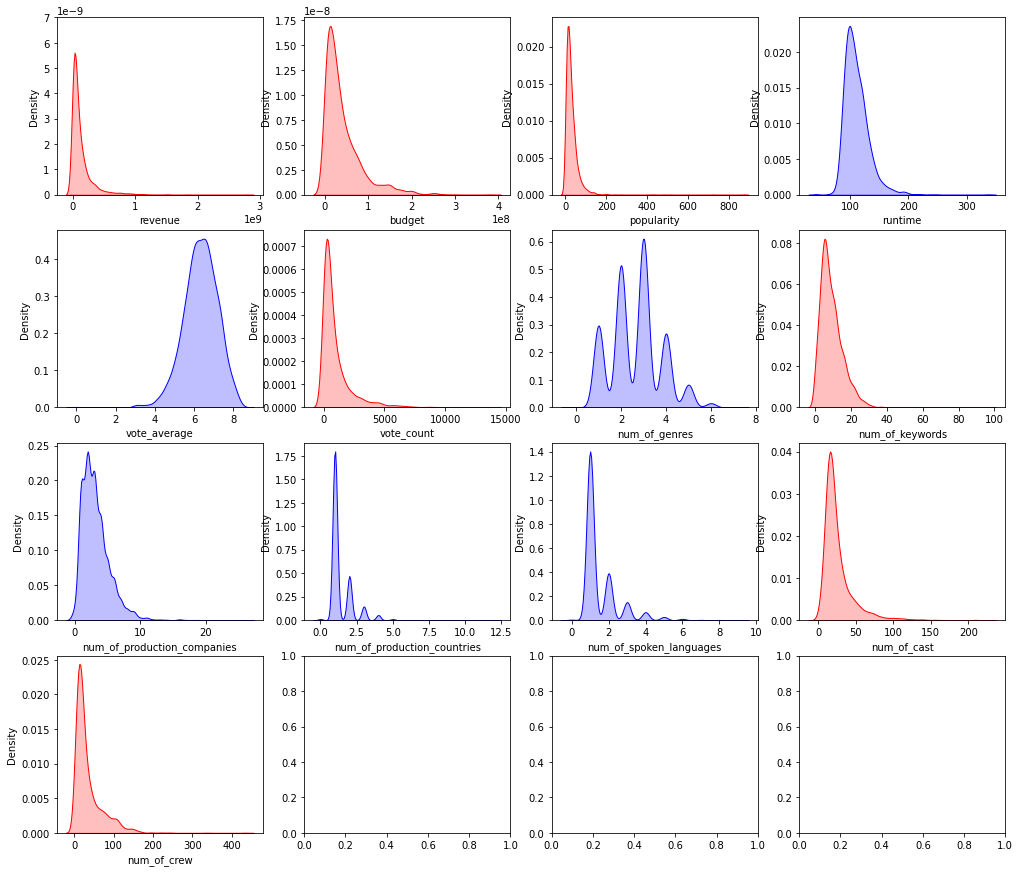

In [160]:
f, axes = plt.subplots(4, 4, figsize=(17, 15))

# sns.kdeplot(np.log1p(data_continuous_before_norm["revenue"]), color="blue", ax=axes[0, 0])
a = sns.kdeplot(data_continuous["revenue"],shade = True, color="red", ax=axes[0, 0])
a.set_ylim(0,0.000000007)
sns.kdeplot(data_continuous["budget"], shade = True,color="red", ax=axes[0, 1])
sns.kdeplot(data_continuous["popularity"], shade = True,color="red", ax=axes[0, 2])
sns.kdeplot(data_continuous["runtime"], shade = True,color="blue", ax=axes[0, 3])
sns.kdeplot(data_continuous["vote_average"],shade = True, color="blue", ax=axes[1, 0])
sns.kdeplot(data_continuous["vote_count"], shade = True,color="red", ax=axes[1, 1])
sns.kdeplot(data_continuous["num_of_genres"], shade = True,color="blue", ax=axes[1, 2])
sns.kdeplot(data_continuous["num_of_keywords"],shade = True, color="red", ax=axes[1, 3])
sns.kdeplot(data_continuous["num_of_production_companies"],shade = True, color="blue", ax=axes[2, 0])
sns.kdeplot(data_continuous["num_of_production_countries"],shade = True, color="blue", ax=axes[2, 1])
sns.kdeplot(data_continuous["num_of_spoken_languages"],shade = True, color="blue", ax=axes[2, 2])
sns.kdeplot(data_continuous["num_of_cast"],shade = True, color="red", ax=axes[2, 3])
sns.kdeplot(data_continuous["num_of_crew"],shade = True, color="red", ax=axes[3, 0])

plt.show()



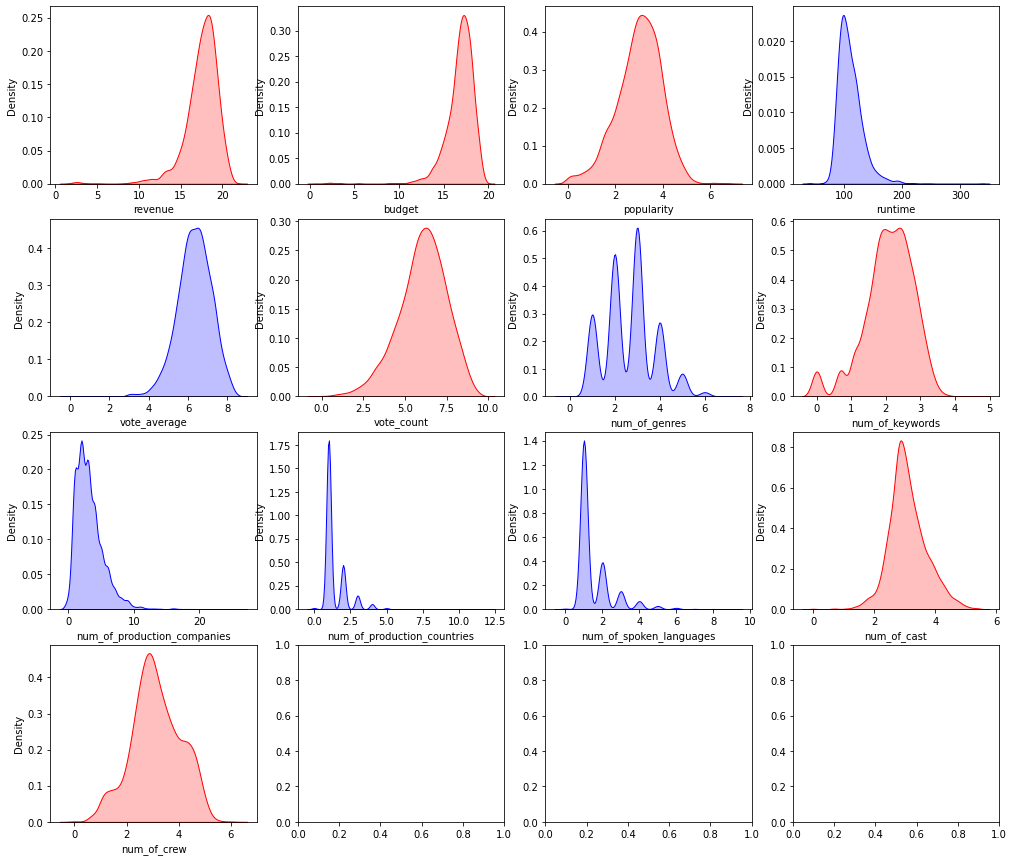

             <Skewness> 
[revenue] : -2.3528692922010075
[budget] : -3.1060573320982794
[popularity] : -0.39085006657604815
[runtime] : 1.6937575956631943
[vote_average] : -0.6078883476953402
[vote_count] : -0.5109641150154453
[num_of_genres] : 0.3757656595561392
[num_of_keywords] : -0.724088786843312
[num_of_production_companies] : 2.0319610862570467
[num_of_production_countries] : 2.9425279185718827
[num_of_spoken_languages] : 2.4197241594551233
[num_of_cast] : 0.32819500246914357
[num_of_crew] : -0.067500453782168


In [161]:

data_logarithm = data_with_revenue.copy()

data_logarithm['revenue'] = np.log1p(data_logarithm['revenue'])
data_logarithm['budget'] = np.log1p(data_logarithm['budget'])
data_logarithm['popularity'] = np.log1p(data_logarithm['popularity'])
data_logarithm['vote_count'] = np.log1p(data_logarithm['vote_count'])
data_logarithm['num_of_keywords'] = np.log1p(data_logarithm['num_of_keywords'])
# data_logarithm['num_of_production_companies'] = np.log1p(data_logarithm['num_of_production_companies'])
# data_logarithm['num_of_production_countries'] = np.log1p(data_logarithm['num_of_production_countries'])
# data_logarithm['num_of_spoken_languages'] = np.log1p(data_logarithm['num_of_spoken_languages'])
data_logarithm['num_of_cast'] = np.log1p(data_logarithm['num_of_cast'])
data_logarithm['num_of_crew'] = np.log1p(data_logarithm['num_of_crew'])
f, axes = plt.subplots(4, 4, figsize=(17, 15))


sns.kdeplot(data_logarithm["revenue"],shade = True, color="red", ax=axes[0, 0])
sns.kdeplot(data_logarithm["budget"], shade = True,color="red", ax=axes[0, 1])
sns.kdeplot(data_logarithm["popularity"], shade = True,color="red", ax=axes[0, 2])
sns.kdeplot(data_logarithm["runtime"], shade = True,color="blue", ax=axes[0, 3])
sns.kdeplot(data_logarithm["vote_average"],shade = True, color="blue", ax=axes[1, 0])
sns.kdeplot(data_logarithm["vote_count"], shade = True,color="red", ax=axes[1, 1])
sns.kdeplot(data_logarithm["num_of_genres"], shade = True,color="blue", ax=axes[1, 2])
sns.kdeplot(data_logarithm["num_of_keywords"],shade = True, color="red", ax=axes[1, 3])
sns.kdeplot(data_logarithm["num_of_production_companies"],shade = True, color="blue", ax=axes[2, 0])
sns.kdeplot(data_logarithm["num_of_production_countries"],shade = True, color="blue", ax=axes[2, 1])
sns.kdeplot(data_logarithm["num_of_spoken_languages"],shade = True, color="blue", ax=axes[2, 2])
sns.kdeplot(data_logarithm["num_of_cast"],shade = True, color="red", ax=axes[2, 3])
sns.kdeplot(data_logarithm["num_of_crew"],shade = True, color="red", ax=axes[3, 0])

plt.show()

print("             <Skewness> ")
print("[revenue] :", scipy.stats.skew(data_logarithm['revenue']))
print("[budget] :", scipy.stats.skew(data_logarithm['budget']))
print("[popularity] :", scipy.stats.skew(data_logarithm['popularity']))
print("[runtime] :", scipy.stats.skew(data_logarithm['runtime']))
print("[vote_average] :", scipy.stats.skew(data_logarithm['vote_average']))
print("[vote_count] :", scipy.stats.skew(data_logarithm['vote_count']))
print("[num_of_genres] :", scipy.stats.skew(data_logarithm['num_of_genres']))
print("[num_of_keywords] :", scipy.stats.skew(data_logarithm['num_of_keywords']))
print("[num_of_production_companies] :", scipy.stats.skew(data_logarithm['num_of_production_companies']))
print("[num_of_production_countries] :", scipy.stats.skew(data_logarithm['num_of_production_countries']))
print("[num_of_spoken_languages] :", scipy.stats.skew(data_logarithm['num_of_spoken_languages']))
print("[num_of_cast] :", scipy.stats.skew(data_logarithm['num_of_cast']))
print("[num_of_crew] :", scipy.stats.skew(data_logarithm['num_of_crew']))


In [162]:
data_logarithm[['revenue','budget','popularity','runtime','vote_average','vote_count','num_of_genres', 'num_of_keywords','num_of_production_companies','num_of_production_countries','num_of_spoken_languages','num_of_cast','num_of_crew' ]]

revenue     budget  ...  num_of_cast  num_of_crew
0     21.748578  19.283571  ...     4.430817     5.036953
1     20.683485  19.519293  ...     3.555348     3.496508
2     20.596199  19.316769  ...     4.430817     5.049856
3     20.804790  19.336971  ...     5.068904     5.384495
4     19.464974  19.376192  ...     3.332205     4.890349
...         ...        ...  ...          ...          ...
4773  14.963272  10.203629  ...     2.772589     2.079442
4788  15.607270   9.392745  ...     2.484907     2.079442
4792  11.502885   9.903538  ...     2.772589     1.098612
4796  12.959282   8.853808  ...     2.995732     1.945910
4798  14.528912  12.301387  ...     2.079442     2.484907

[3229 rows x 13 columns]

In [163]:
from sklearn.preprocessing import StandardScaler

data_logarithm_zscore = data_logarithm[['revenue','budget','popularity','runtime','vote_average','vote_count','num_of_genres', 'num_of_keywords','num_of_production_companies','num_of_production_countries','num_of_spoken_languages','num_of_cast','num_of_crew' ]]
standardScaler = StandardScaler()
standardScaler.fit(data_logarithm_zscore)
data_logarithm_zscore[:] = standardScaler.transform(data_logarithm_zscore[:])
data_logarithm_zscore


revenue    budget  ...  num_of_cast  num_of_crew
0     2.048371  1.494788  ...     2.174657     2.019212
1     1.535923  1.636657  ...     0.755598     0.390492
2     1.493927  1.514768  ...     2.174657     2.032855
3     1.594286  1.526927  ...     3.208942     2.386670
4     0.949661  1.550532  ...     0.393901     1.864208
...        ...       ...  ...          ...          ...
4773 -1.216242 -3.969949  ...    -0.513188    -1.107779
4788 -0.906395 -4.457978  ...    -0.979496    -1.107779
4792 -2.881137 -4.150559  ...    -0.513188    -2.144814
4796 -2.180421 -4.782335  ...    -0.151492    -1.248962
4798 -1.425226 -2.707420  ...    -1.636720    -0.679079

[3229 rows x 13 columns]

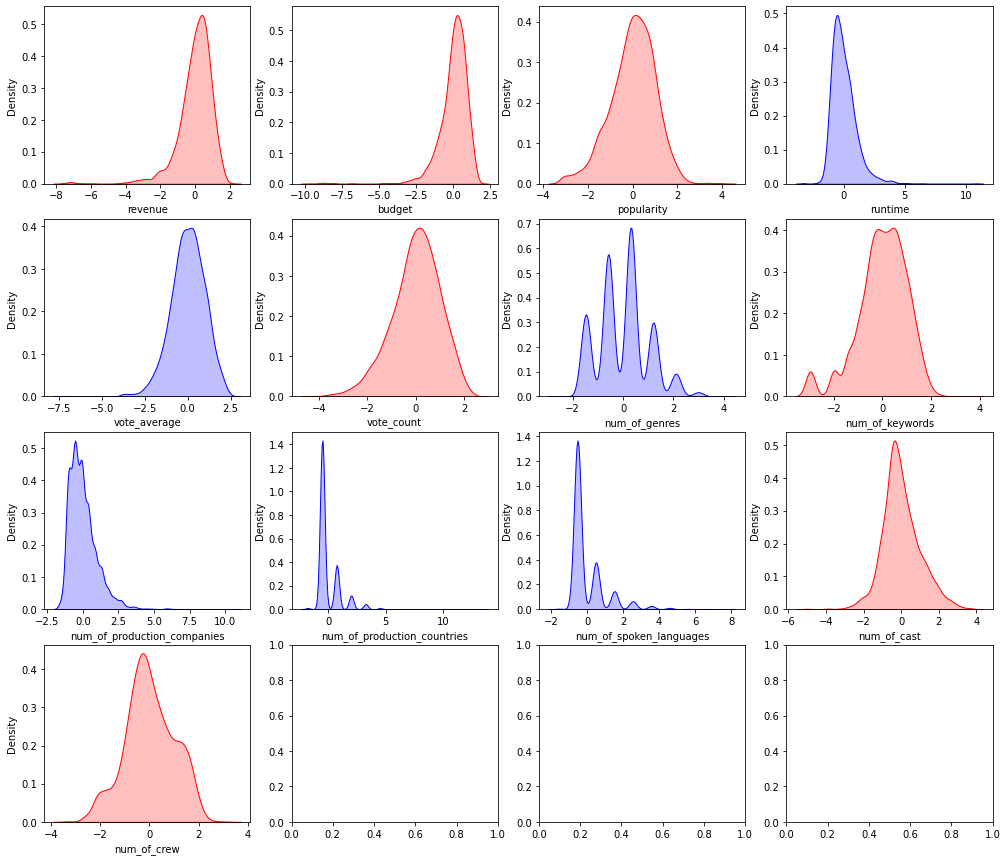

             <Skewness> 
[revenue] : -2.352869292201002
[budget] : -3.1060573320982825
[popularity] : -0.39085006657604715
[runtime] : 1.693757595663194
[vote_average] : -0.6078883476953383
[vote_count] : -0.5109641150154465
[num_of_genres] : 0.37576565955613983
[num_of_keywords] : -0.7240887868433133
[num_of_production_companies] : 2.0319610862570463
[num_of_production_countries] : 2.9425279185718836
[num_of_spoken_languages] : 2.419724159455123
[num_of_cast] : 0.3281950024691434
[num_of_crew] : -0.06750045378216724


In [164]:
# f, axes = plt.subplots(4, 4, figsize=(17, 15))

# sns.kdeplot(data_logarithm_zscore["revenue"],shade = True, color="red", ax=axes[0, 0])
# sns.kdeplot(data_logarithm_zscore["budget"], shade = True,color="red", ax=axes[0, 1])
# sns.kdeplot(data_logarithm_zscore["popularity"], shade = True,color="red", ax=axes[0, 2])
# sns.kdeplot(data_logarithm_zscore["runtime"], shade = True,color="blue", ax=axes[0, 3])
# sns.kdeplot(data_logarithm_zscore["vote_average"],shade = True, color="blue", ax=axes[1, 0])
# sns.kdeplot(data_logarithm_zscore["vote_count"], shade = True,color="red", ax=axes[1, 1])
# sns.kdeplot(data_logarithm_zscore["num_of_genres"], shade = True,color="blue", ax=axes[1, 2])
# sns.kdeplot(data_logarithm_zscore["num_of_keywords"],shade = True, color="red", ax=axes[1, 3])
# sns.kdeplot(data_logarithm_zscore["num_of_production_companies"],shade = True, color="blue", ax=axes[2, 0])
# sns.kdeplot(data_logarithm_zscore["num_of_production_countries"],shade = True, color="blue", ax=axes[2, 1])
# sns.kdeplot(data_logarithm_zscore["num_of_spoken_languages"],shade = True, color="blue", ax=axes[2, 2])
# sns.kdeplot(data_logarithm_zscore["num_of_cast"],shade = True, color="red", ax=axes[2, 3])
# sns.kdeplot(data_logarithm_zscore["num_of_crew"],shade = True, color="red", ax=axes[3, 0])
# plt.show()

# print("             <Skewness> ")
# print("[revenue] :", scipy.stats.skew(data_logarithm_zscore['revenue']))
# print("[budget] :", scipy.stats.skew(data_logarithm_zscore['budget']))
# print("[popularity] :", scipy.stats.skew(data_logarithm_zscore['popularity']))
# print("[runtime] :", scipy.stats.skew(data_logarithm_zscore['runtime']))
# print("[vote_average] :", scipy.stats.skew(data_logarithm_zscore['vote_average']))
# print("[vote_count] :", scipy.stats.skew(data_logarithm_zscore['vote_count']))
# print("[num_of_genres] :", scipy.stats.skew(data_logarithm_zscore['num_of_genres']))
# print("[num_of_keywords] :", scipy.stats.skew(data_logarithm_zscore['num_of_keywords']))
# print("[num_of_production_companies] :", scipy.stats.skew(data_logarithm_zscore['num_of_production_companies']))
# print("[num_of_production_countries] :", scipy.stats.skew(data_logarithm_zscore['num_of_production_countries']))
# print("[num_of_spoken_languages] :", scipy.stats.skew(data_logarithm_zscore['num_of_spoken_languages']))
# print("[num_of_cast] :", scipy.stats.skew(data_logarithm_zscore['num_of_cast']))
# print("[num_of_crew] :", scipy.stats.skew(data_logarithm_zscore['num_of_crew']))



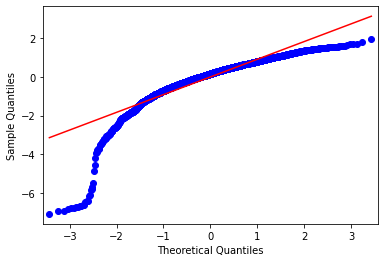

In [97]:
qq = sm.qqplot(data_logarithm_zscore['revenue'], line = 'r')
plt.show()

#MinMax Scalar

In [91]:

# data_logarithm_zscore_minmax = data_logarithm_zscore[['revenue','budget','popularity','runtime','vote_average','vote_count','num_of_genres', 'num_of_keywords','num_of_production_companies','num_of_production_countries','num_of_spoken_languages','num_of_cast','num_of_crew' ]]
# transformer = MinMaxScaler()

# transformer.fit(data_logarithm_zscore_minmax)
# data_logarithm_zscore_minmax[:] = transformer.fit_transform(data_logarithm_zscore_minmax[:])
# data_logarithm_zscore_minmax

# #result
# data_logarithm_zscore_minmax

revenue    budget  ...  num_of_cast  num_of_crew
0     1.000000  0.976103  ...     0.818082     0.828768
1     0.946630  0.988034  ...     0.656441     0.575307
2     0.942256  0.977783  ...     0.818082     0.830891
3     0.952708  0.978806  ...     0.935896     0.885951
4     0.885573  0.980791  ...     0.615241     0.804646
...        ...       ...  ...          ...          ...
4775  0.473950  0.000000  ...     0.511916     0.228097
4788  0.692270  0.475445  ...     0.458800     0.342146
4792  0.486607  0.501301  ...     0.511916     0.180763
4796  0.559584  0.448165  ...     0.553116     0.320175
4798  0.638236  0.622676  ...     0.383937     0.408860

[3376 rows x 13 columns]

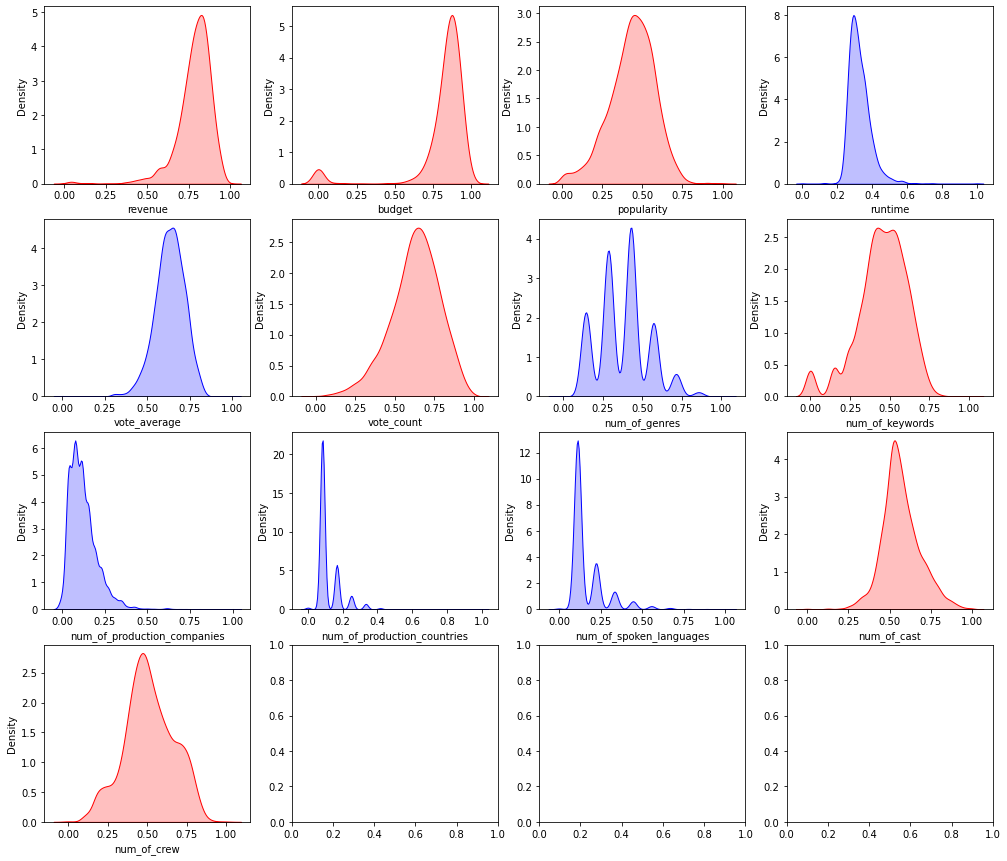

             <Skewness> 
[revenue] : -2.401502559744587
[budget] : -3.4442552911254842
[popularity] : -0.4018100341694959
[runtime] : 1.6649172709877686
[vote_average] : -0.628752311823948
[vote_count] : -0.5145755087611766
[num_of_genres] : 0.3899779075129724
[num_of_keywords] : -0.7063454418248342
[num_of_production_companies] : 2.0472662659549576
[num_of_production_countries] : 2.911929236174896
[num_of_spoken_languages] : 2.4324897602493603
[num_of_cast] : 0.32678860513690466
[num_of_crew] : -0.06146141992359426


In [92]:
# f, axes = plt.subplots(4, 4, figsize=(17, 15))

# sns.kdeplot(data_logarithm_zscore_minmax["revenue"],shade = True, color="red", ax=axes[0, 0])
# sns.kdeplot(data_logarithm_zscore_minmax["budget"], shade = True,color="red", ax=axes[0, 1])
# sns.kdeplot(data_logarithm_zscore_minmax["popularity"], shade = True,color="red", ax=axes[0, 2])
# sns.kdeplot(data_logarithm_zscore_minmax["runtime"], shade = True,color="blue", ax=axes[0, 3])
# sns.kdeplot(data_logarithm_zscore_minmax["vote_average"],shade = True, color="blue", ax=axes[1, 0])
# sns.kdeplot(data_logarithm_zscore_minmax["vote_count"], shade = True,color="red", ax=axes[1, 1])
# sns.kdeplot(data_logarithm_zscore_minmax["num_of_genres"], shade = True,color="blue", ax=axes[1, 2])
# sns.kdeplot(data_logarithm_zscore_minmax["num_of_keywords"],shade = True, color="red", ax=axes[1, 3])
# sns.kdeplot(data_logarithm_zscore_minmax["num_of_production_companies"],shade = True, color="blue", ax=axes[2, 0])
# sns.kdeplot(data_logarithm_zscore_minmax["num_of_production_countries"],shade = True, color="blue", ax=axes[2, 1])
# sns.kdeplot(data_logarithm_zscore_minmax["num_of_spoken_languages"],shade = True, color="blue", ax=axes[2, 2])
# sns.kdeplot(data_logarithm_zscore_minmax["num_of_cast"],shade = True, color="red", ax=axes[2, 3])
# sns.kdeplot(data_logarithm_zscore_minmax["num_of_crew"],shade = True, color="red", ax=axes[3, 0])
# plt.show()

# print("             <Skewness> ")
# print("[revenue] :", scipy.stats.skew(data_logarithm_zscore_minmax['revenue']))
# print("[budget] :", scipy.stats.skew(data_logarithm_zscore_minmax['budget']))
# print("[popularity] :", scipy.stats.skew(data_logarithm_zscore_minmax['popularity']))
# print("[runtime] :", scipy.stats.skew(data_logarithm_zscore_minmax['runtime']))
# print("[vote_average] :", scipy.stats.skew(data_logarithm_zscore_minmax['vote_average']))
# print("[vote_count] :", scipy.stats.skew(data_logarithm_zscore_minmax['vote_count']))
# print("[num_of_genres] :", scipy.stats.skew(data_logarithm_zscore_minmax['num_of_genres']))
# print("[num_of_keywords] :", scipy.stats.skew(data_logarithm_zscore_minmax['num_of_keywords']))
# print("[num_of_production_companies] :", scipy.stats.skew(data_logarithm_zscore_minmax['num_of_production_companies']))
# print("[num_of_production_countries] :", scipy.stats.skew(data_logarithm_zscore_minmax['num_of_production_countries']))
# print("[num_of_spoken_languages] :", scipy.stats.skew(data_logarithm_zscore_minmax['num_of_spoken_languages']))
# print("[num_of_cast] :", scipy.stats.skew(data_logarithm_zscore_minmax['num_of_cast']))
# print("[num_of_crew] :", scipy.stats.skew(data_logarithm_zscore_minmax['num_of_crew']))



# Correlation

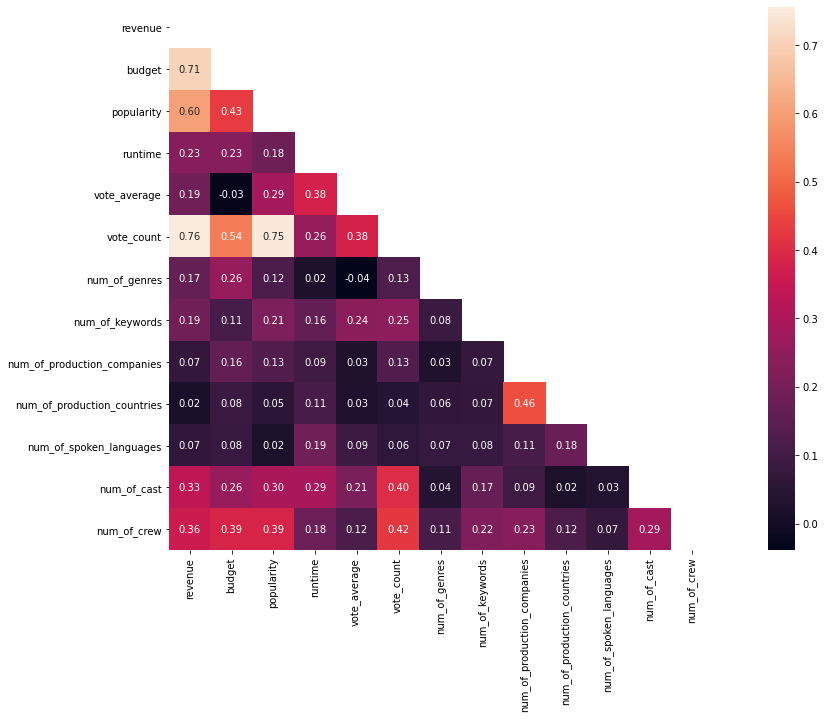

In [165]:
data_continuous_before_norm = data_with_revenue[['revenue','budget','popularity','runtime','vote_average','vote_count','num_of_genres', 'num_of_keywords','num_of_production_companies','num_of_production_countries','num_of_spoken_languages','num_of_cast','num_of_crew' ]]

corr = data_continuous_before_norm.corr(method = 'pearson')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True,mask = mask , fmt=".2f",square = True, linecolor = "white")


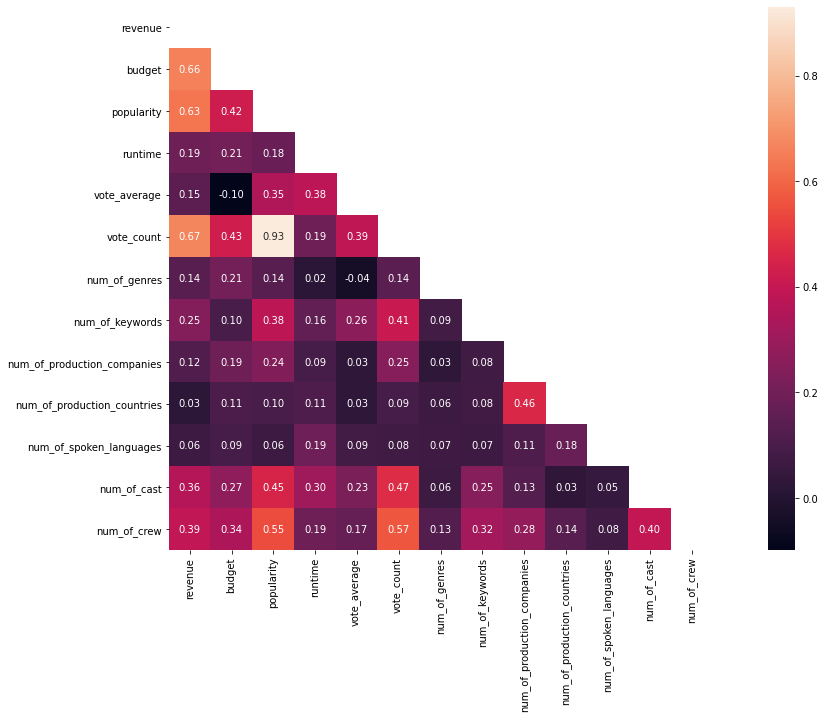

In [166]:
corr = data_logarithm_zscore.corr(method = 'pearson')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True,mask = mask , fmt=".2f",square = True, linecolor = "white")


Text(0.5, 1.0, 'Scatter plot between revenue and num_of_spoken_languages')

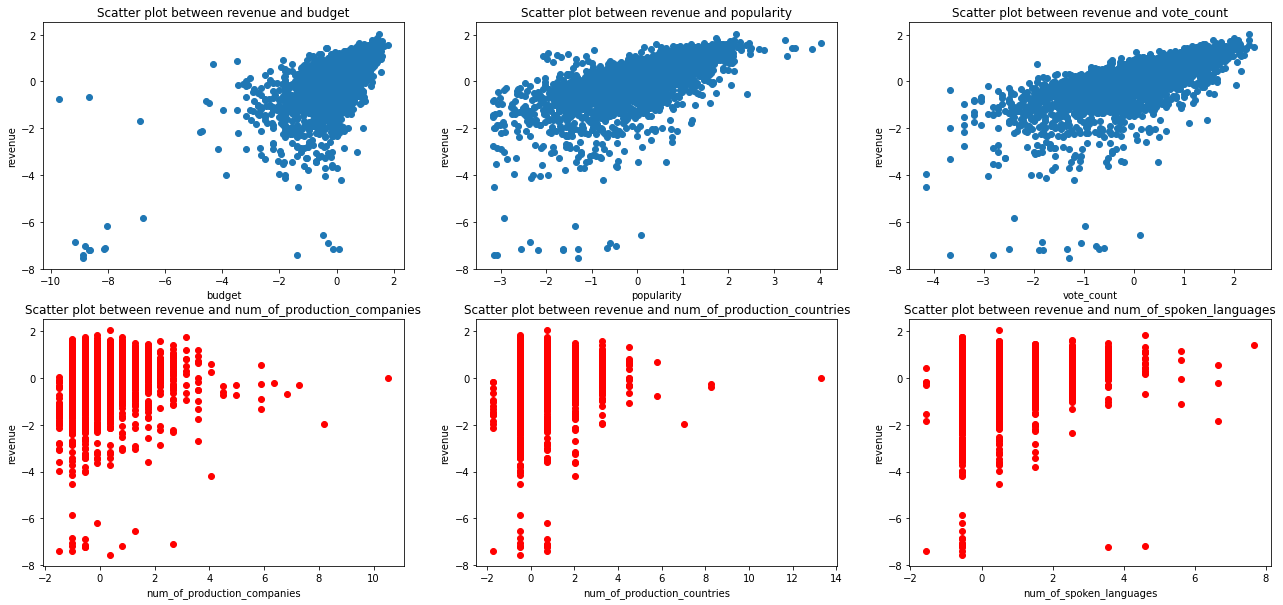

In [168]:
#Top 3 correlated variables with revenue
fig = plt.figure(figsize=(22, 10)) 
plt.subplot(2,3,1).scatter(x = data_logarithm_zscore['budget'], y = data_logarithm_zscore['revenue']) 
plt.xlabel("budget") 
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and budget')

plt.subplot(2,3,2).scatter(x = data_logarithm_zscore['popularity'], y =data_logarithm_zscore['revenue']) 
plt.xlabel("popularity") 
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and popularity')

plt.subplot(2,3,3).scatter(x = data_logarithm_zscore['vote_count'], y =data_logarithm_zscore['revenue']) 
plt.xlabel("vote_count")
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and vote_count')

#Bottom 3 correlated variables with revenue
plt.subplot(2,3,4).scatter(x = data_logarithm_zscore['num_of_production_companies'], y = data_logarithm_zscore['revenue'],c = 'red') 
plt.xlabel("num_of_production_companies") 
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and num_of_production_companies')

plt.subplot(2,3,5).scatter(x = data_logarithm_zscore['num_of_production_countries'], y =data_logarithm_zscore['revenue'],c = 'red') 
plt.xlabel("num_of_production_countries") 
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and num_of_production_countries')

plt.subplot(2,3,6).scatter(x = data_logarithm_zscore['num_of_spoken_languages'], y =data_logarithm_zscore['revenue'],c = 'red') 
plt.xlabel("num_of_spoken_languages")
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and num_of_spoken_languages')

#Regression modeling

In [173]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#check Multicollinearity
y,x = dmatrices("revenue ~   budget +	popularity +runtime	+ vote_average	+ vote_count	+ num_of_genres	+ num_of_keywords +	num_of_production_companies	+ num_of_production_countries	+ num_of_spoken_languages	+ num_of_cast	+ num_of_crew	", data=data_logarithm_zscore, return_type = "dataframe")

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif.round(1)

VIF Factor                     features
0          1.0                    Intercept
1          1.5                       budget
2          7.6                   popularity
3          1.4                      runtime
4          1.6                 vote_average
5          8.6                   vote_count
6          1.1                num_of_genres
7          1.3              num_of_keywords
8          1.4  num_of_production_companies
9          1.3  num_of_production_countries
10         1.1      num_of_spoken_languages
11         1.4                  num_of_cast
12         1.6                  num_of_crew

In [175]:
def get_model1(seed):
    df_train, df_test = train_test_split(data_logarithm_zscore, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +	popularity +runtime	+ vote_average	+ vote_count	+ num_of_genres	+ num_of_keywords +	num_of_production_companies	+ num_of_production_countries	+ num_of_spoken_languages	+ num_of_cast	+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     353.9
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:36:08   Log-Likelihood:                -2430.7
No. Observations:                2583   AIC:                             4887.
Df Residuals:                    2570   BIC:                             4964.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [176]:
def get_model1(seed):
    df_train, df_test = train_test_split(data_logarithm_zscore, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget  +runtime	+ vote_average	+ vote_count	+ num_of_genres	+ num_of_keywords +	num_of_production_companies	+ num_of_production_countries	+ num_of_spoken_languages	+ num_of_cast	+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     386.1
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:37:09   Log-Likelihood:                -2430.8
No. Observations:                2583   AIC:                             4886.
Df Residuals:                    2571   BIC:                             4956.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [177]:
def get_model1(seed):
    df_train, df_test = train_test_split(data_logarithm_zscore, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget  +runtime	+ vote_average	+ vote_count	+ num_of_genres	+ num_of_keywords +	num_of_production_companies	+ num_of_production_countries		+ num_of_cast	+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     424.9
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:37:37   Log-Likelihood:                -2430.9
No. Observations:                2583   AIC:                             4884.
Df Residuals:                    2572   BIC:                             4948.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [179]:
def get_model1(seed):
    df_train, df_test = train_test_split(data_logarithm_zscore, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget  +runtime	+ vote_average	+ vote_count	+ num_of_genres	+ num_of_keywords +	num_of_production_companies	+ num_of_production_countries		+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     472.2
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:37:54   Log-Likelihood:                -2431.0
No. Observations:                2583   AIC:                             4882.
Df Residuals:                    2573   BIC:                             4941.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [180]:
def get_model1(seed):
    df_train, df_test = train_test_split(data_logarithm_zscore, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget  +runtime	+ vote_average	+ vote_count	+ num_of_genres	 +	num_of_production_companies	+ num_of_production_countries		+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     530.9
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:38:07   Log-Likelihood:                -2431.7
No. Observations:                2583   AIC:                             4881.
Df Residuals:                    2574   BIC:                             4934.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [182]:
def get_model1(seed):
    df_train, df_test = train_test_split(data_logarithm_zscore, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget 	+ vote_count	+ num_of_genres	 +	num_of_production_companies	+ num_of_production_countries		+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     706.5
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:38:45   Log-Likelihood:                -2433.9
No. Observations:                2583   AIC:                             4882.
Df Residuals:                    2576   BIC:                             4923.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

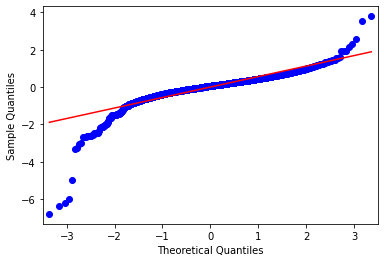

In [183]:
qq = sm.qqplot(result1.resid, line = 'r')
plt.show()

In [184]:
RMSE = np.sqrt((result1.resid **2).mean())
RMSE

0.6208580076325768

In [192]:
def get_model1(seed):
    df_train, df_test = train_test_split(data_logarithm_zscore, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +	popularity	+ vote_average", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     1201.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:43:16   Log-Likelihood:                -2561.6
No. Observations:                2583   AIC:                             5131.
Df Residuals:                    2579   BIC:                             5155.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0057      0.013     -0.445   

In [310]:
def get_model1(seed):
    df_train, df_test = train_test_split(data_logarithm_zscore, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +	popularity	+ vote_average + vote_count", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

#We can see that p value is large when there are popularity, and vote_count, and I think this is because they have high multicollinearity.(Look at the VIF value).
# So if you want to add those two features in this model, we should do dimension reduction like PCA analysis or SVM.

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     1015.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:43:12   Log-Likelihood:                -2468.8
No. Observations:                2583   AIC:                             4948.
Df Residuals:                    2578   BIC:                             4977.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0068      0.012     -0.550   

In [311]:
def get_model1(seed):
    df_train, df_test = train_test_split(data_logarithm_zscore, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +	popularity	+ vote_average	+ num_of_keywords", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     905.1
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:43:15   Log-Likelihood:                -2557.4
No. Observations:                2583   AIC:                             5125.
Df Residuals:                    2578   BIC:                             5154.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0054      0.013     

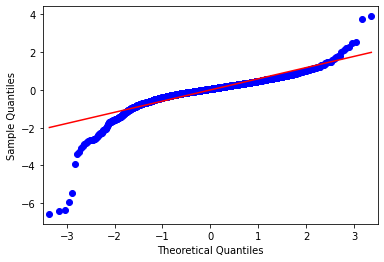

In [195]:
qq = sm.qqplot(result1.resid, line = 'r')
plt.show()

In [196]:
RMSE = np.sqrt((result1.resid **2).mean())
RMSE

0.651269537449376

In [223]:
def get_model1(seed):
    df_train, df_test = train_test_split(data_logarithm_zscore, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget 	+ vote_average		+ num_of_keywords +	num_of_production_companies	+ num_of_production_countries	+ num_of_cast	+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     378.9
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:53:52   Log-Likelihood:                -2775.9
No. Observations:                2583   AIC:                             5568.
Df Residuals:                    2575   BIC:                             5615.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [318]:
train_features  = df_train[["budget","popularity","vote_average",	"num_of_keywords"] ]
train_target = df_train['revenue']

test_features = df_test[["budget","popularity","vote_average",	"num_of_keywords"] ]
test_target = df_test['revenue']

#Linear Regression(sklearn)

In [319]:
from sklearn import linear_model
linear = linear_model.LinearRegression()

linear.fit(train_features,train_target)
print(linear.score(train_features,train_target))
print(linear.score(test_features,test_target)) # accuracy



0.5840785901406791
0.6113555168487299


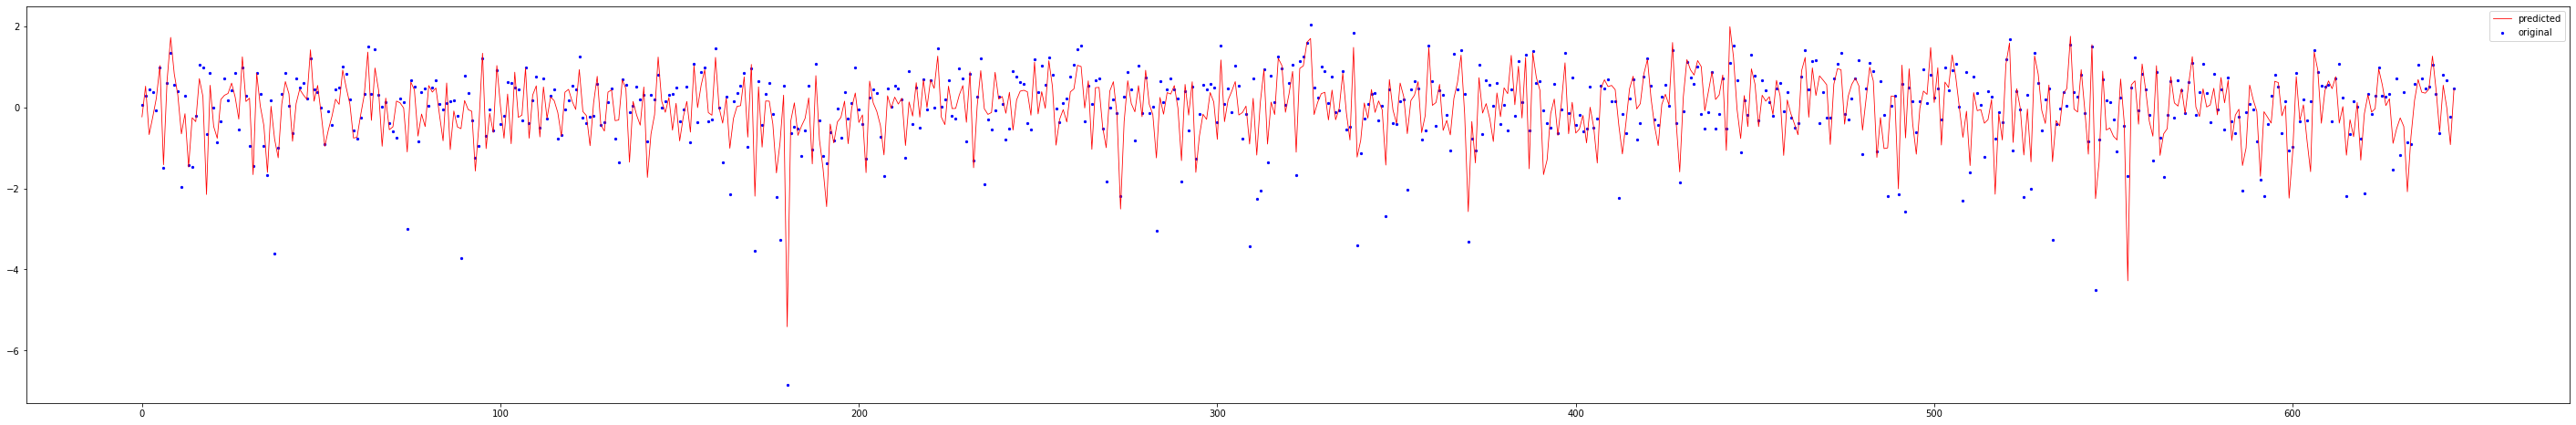

In [320]:
linear_prediction = linear.predict(test_features)

fig = plt.figure(figsize = (50,8))

x_ax = range(len(test_features))
plt.scatter(x_ax, test_target, s=5, color="blue", label="original")
plt.plot(x_ax, linear_prediction, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [321]:
df = pd.DataFrame() 
names = ["budget","popularity","vote_average",	"num_of_keywords"] 
df['feature'] = names  
df['coefficient'] = linear.coef_.flatten() 
df = df.set_index('feature') 
df


coefficient
feature                     
budget              0.489009
popularity          0.409455
vote_average        0.032979
num_of_keywords     0.040322

In [322]:
linear.intercept_

-0.00542397671870334

#Ridge Regression

In [224]:
from sklearn.linear_model import Ridge
ridge = Ridge()

ridge.fit(train_features,train_target)
print(ridge.score(train_features,train_target))
print(ridge.score(test_features,test_target)) # accuracy



0.6229604842911239
0.6428587643822954


In [248]:
train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100, 1000]
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_features, train_target)
  train_score.append(ridge.score(train_features,train_target))
  test_score.append(ridge.score(test_features,test_target))

print(train_score)
print(test_score)

[0.6229607947698471, 0.622960794738818, 0.6229607916386113, 0.6229604842911239, 0.6229322185844643, 0.6214238671082986, 0.5934143220912386]
[0.6428459211256278, 0.6428460395912549, 0.6428472214642391, 0.6428587643822954, 0.6429489385313218, 0.64257142058537, 0.6224124701664554]


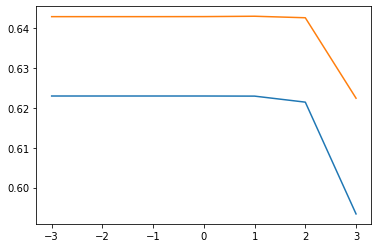

In [249]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [253]:
from sklearn.metrics import mean_squared_error
for a in alpha_list:
  model = Ridge(alpha=a).fit(x,y)
  score = model.score(x, y)
  pred_y = model.predict(x)
  mse = mean_squared_error(y, pred_y)
  print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
  .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0010, R2:0.63, MSE:0.37, RMSE:0.61
Alpha:0.0100, R2:0.63, MSE:0.37, RMSE:0.61
Alpha:0.1000, R2:0.63, MSE:0.37, RMSE:0.61
Alpha:1.0000, R2:0.63, MSE:0.37, RMSE:0.61
Alpha:10.0000, R2:0.63, MSE:0.37, RMSE:0.61
Alpha:100.0000, R2:0.63, MSE:0.37, RMSE:0.61
Alpha:1000.0000, R2:0.60, MSE:0.40, RMSE:0.63


In [296]:
ridge = Ridge(alpha = 0.1)

ridge.fit(train_features,train_target)
print(ridge.score(train_features,train_target))
print(ridge.score(test_features,test_target)) # accuracy

#There's no change

0.6229607916386113
0.6428472214642391


In [255]:
ridge = Ridge(alpha = 0.1)

ridge.fit(train_features,train_target)
print(ridge.score(train_features,train_target))
print(ridge.score(test_features,test_target)) # accuracy

#There's no change

0.6229607916386113
0.6428472214642391


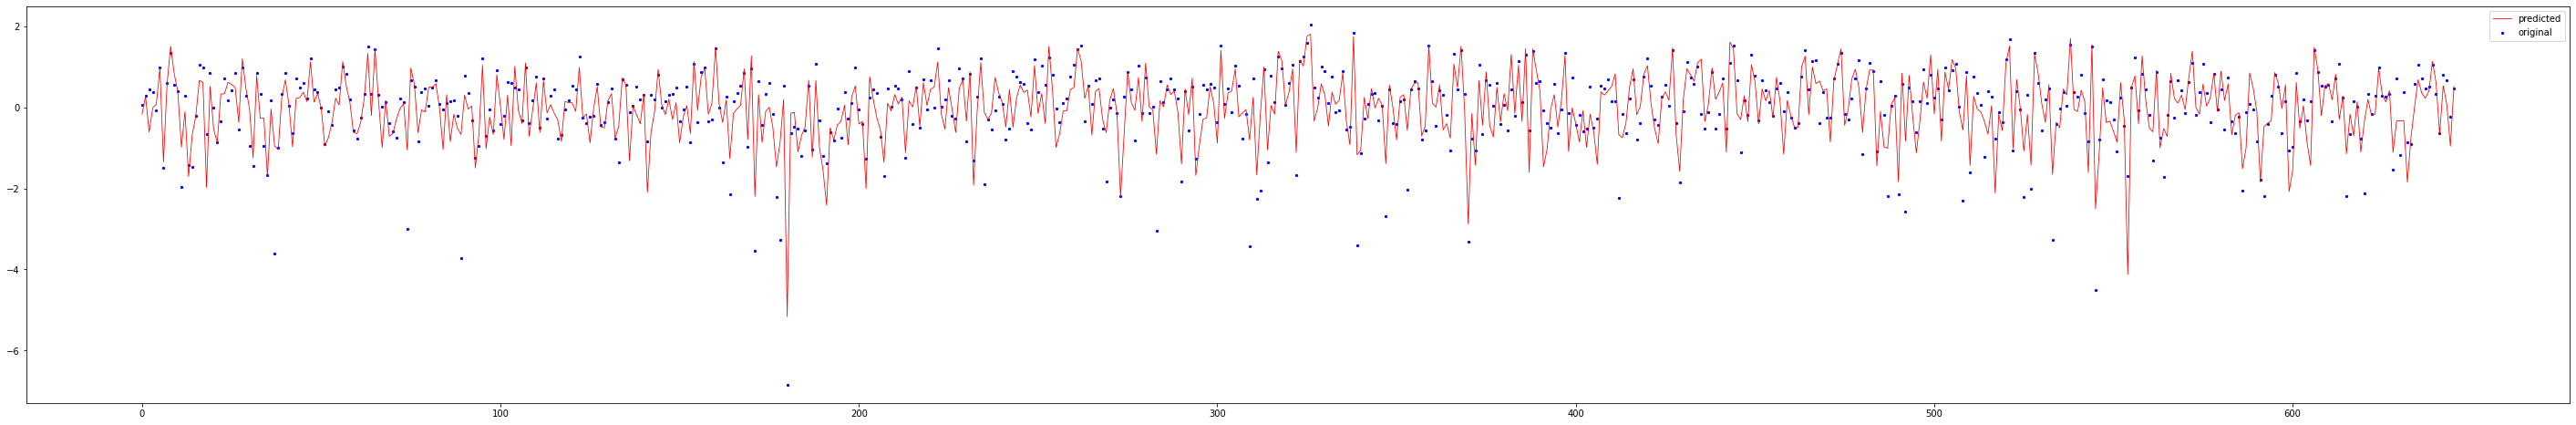

In [285]:
ridge_prediction = ridge.predict(test_features)

fig = plt.figure(figsize = (50,8))

x_ax = range(len(test_features))
plt.scatter(x_ax, test_target, s=5, color="blue", label="original")
plt.plot(x_ax, ridge_prediction, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

#ElasticNet

In [291]:
train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100, 1000]
for alpha in alpha_list:
  elasticNet = ElasticNet(alpha = alpha)
  elasticNet.fit(train_features, train_target)
  train_score.append(elasticNet.score(train_features,train_target))
  test_score.append(elasticNet.score(test_features,test_target))

print(train_score)
print(test_score)

[0.6229555984472142, 0.6224640242510019, 0.6071635723893942, 0.20666237513618635, 0.0, 0.0, 0.0]
[0.6431150468210718, 0.6450667931791261, 0.6378202397216547, 0.2279297085848758, -9.051439706220243e-05, -9.051439706220243e-05, -9.051439706220243e-05]


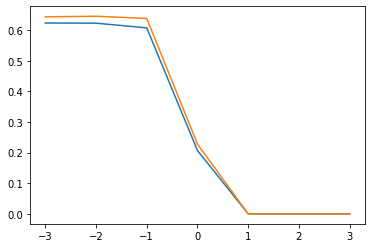

In [292]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

0.6071635723893942
0.6378202397216547


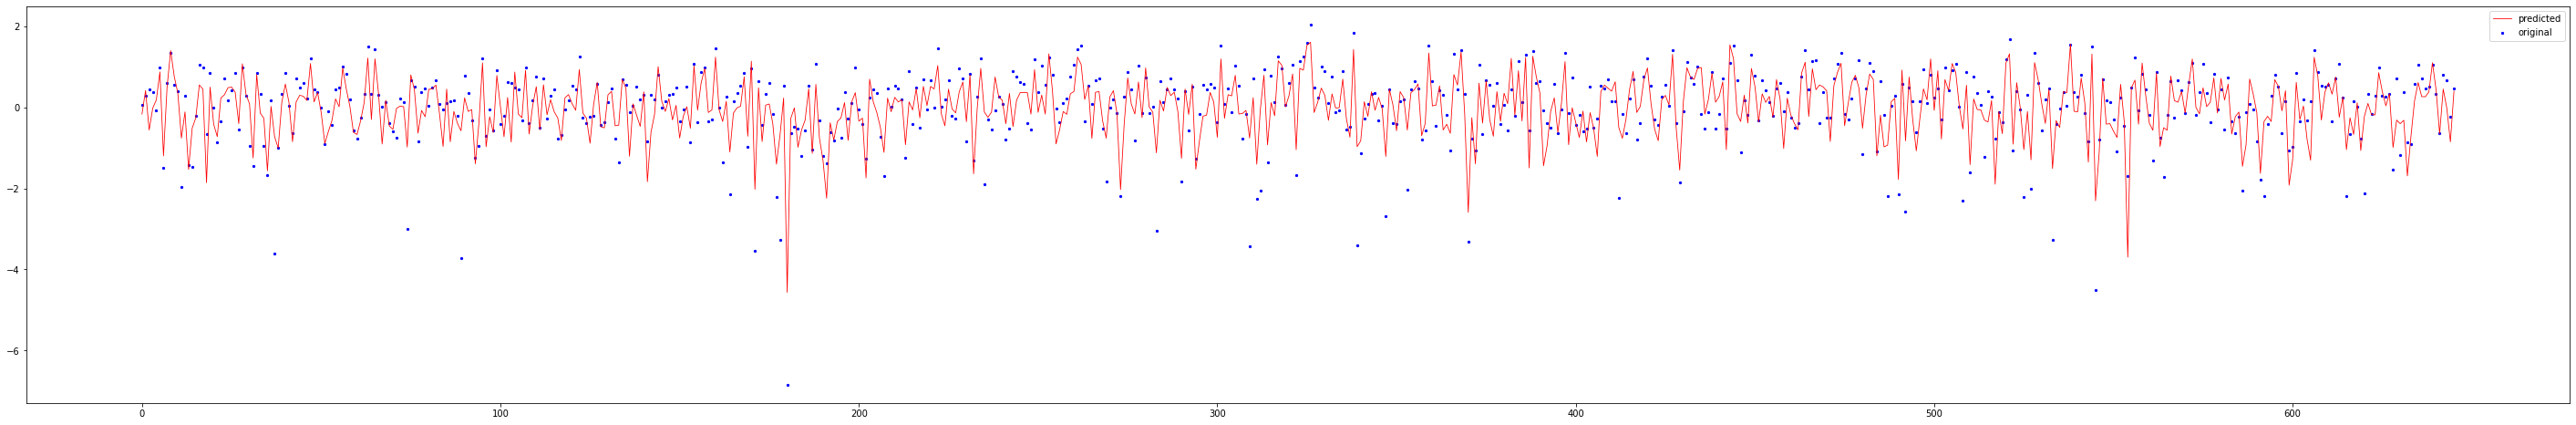

In [293]:
from sklearn.linear_model import ElasticNet
elasticNet = ElasticNet(alpha = 0.1)

elasticNet.fit(train_features,train_target)
print(elasticNet.score(train_features,train_target))
print(elasticNet.score(test_features,test_target)) # accuracy


elasticNet_prediction = elasticNet.predict(test_features)

fig = plt.figure(figsize = (50,8))

x_ax = range(len(test_features))
plt.scatter(x_ax, test_target, s=5, color="blue", label="original")
plt.plot(x_ax, elasticNet_prediction, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

#ANN

In [375]:
#코로나 바이러스 분석
import numpy as np
import random
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

random.seed(777)  # for reproducibility

#하이퍼 파라미터 설정
learning_rate = 0.003
batch_size = 5
training_epochs = 150
drop_rate = 0.05


data1 = data_logarithm_zscore[["revenue","budget","popularity","vote_average",	"num_of_keywords"] ]

#데이터 슬라이싱 
x = data1.iloc[:,1:5]
y = data1[['revenue']]
#Train Data와 Test Data 나누기
x_train, x_test, y_train, y_test = train_test_split(x,y) 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

#형변환
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
# y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
# y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 70)                350       
_________________________________________________________________
dropout_55 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_96 (Dense)             (None, 70)                4970      
_________________________________________________________________
dropout_56 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_97 (Dense)             (None, 70)                4970      
_________________________________________________________________
dropout_57 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_98 (Dense)             (None, 70)              

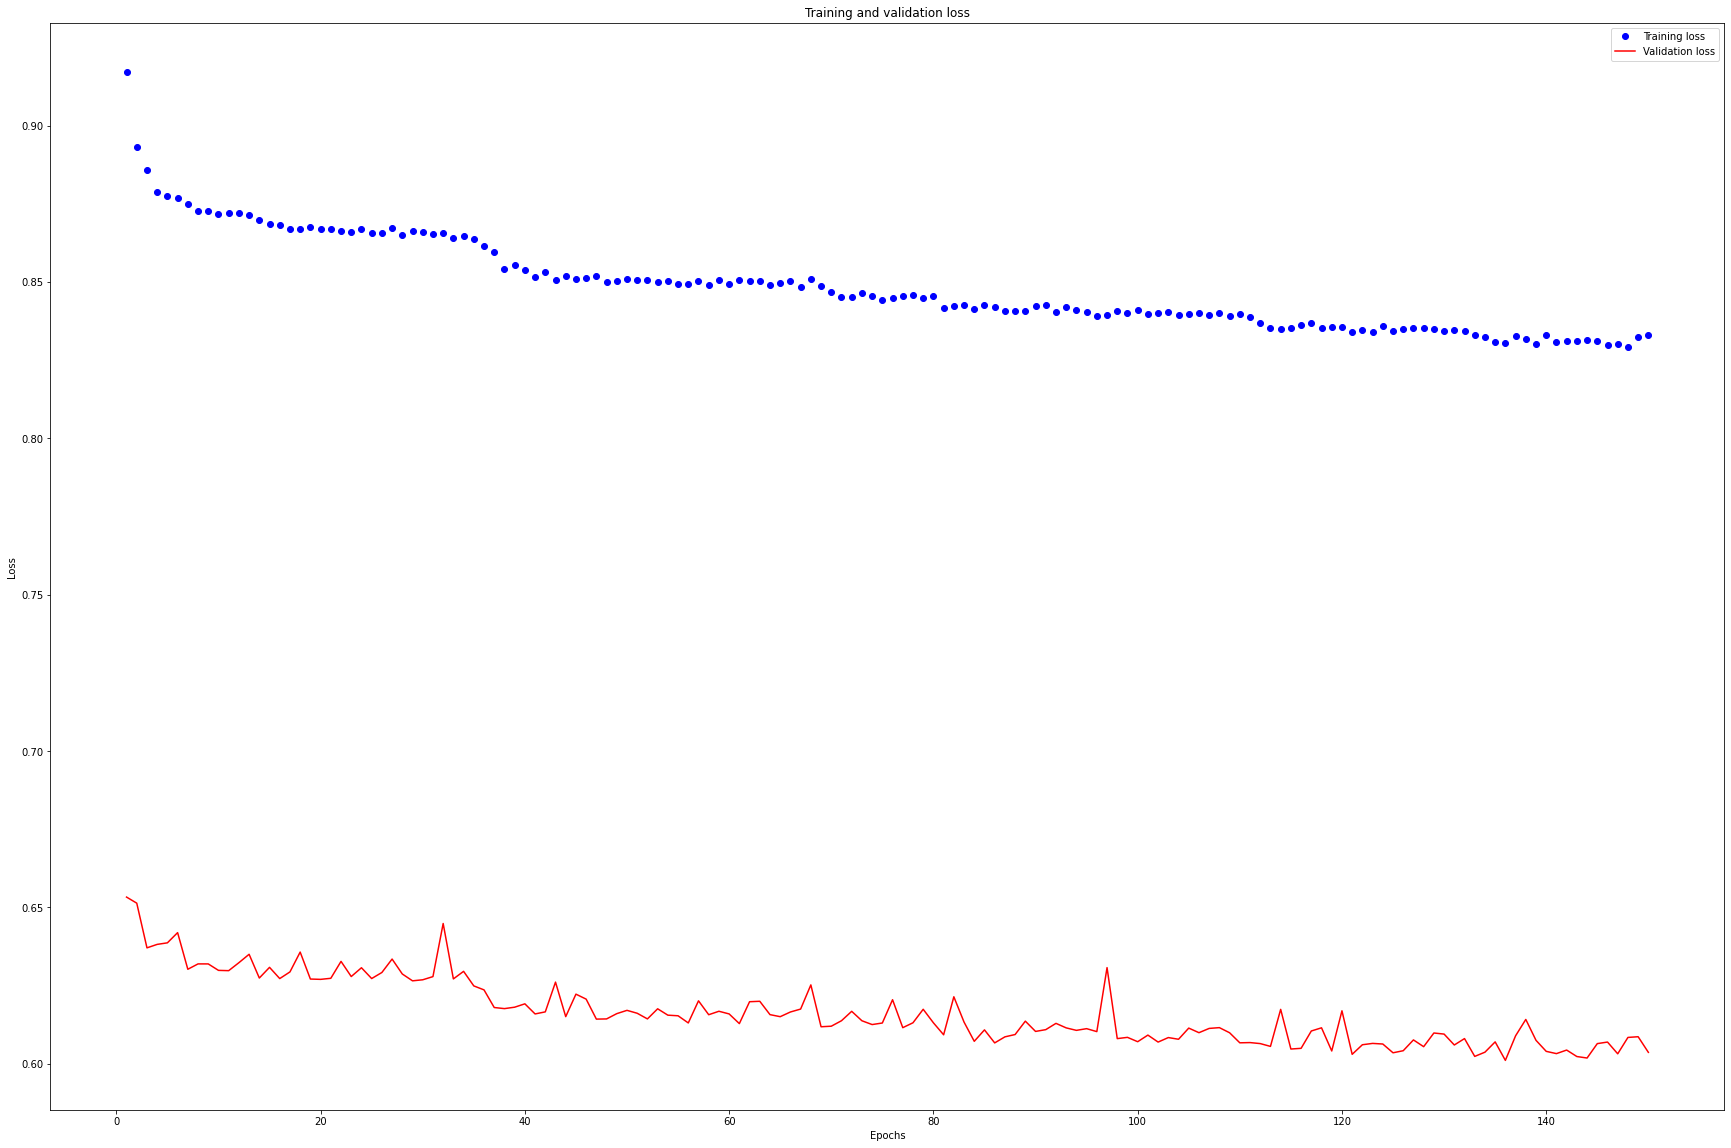

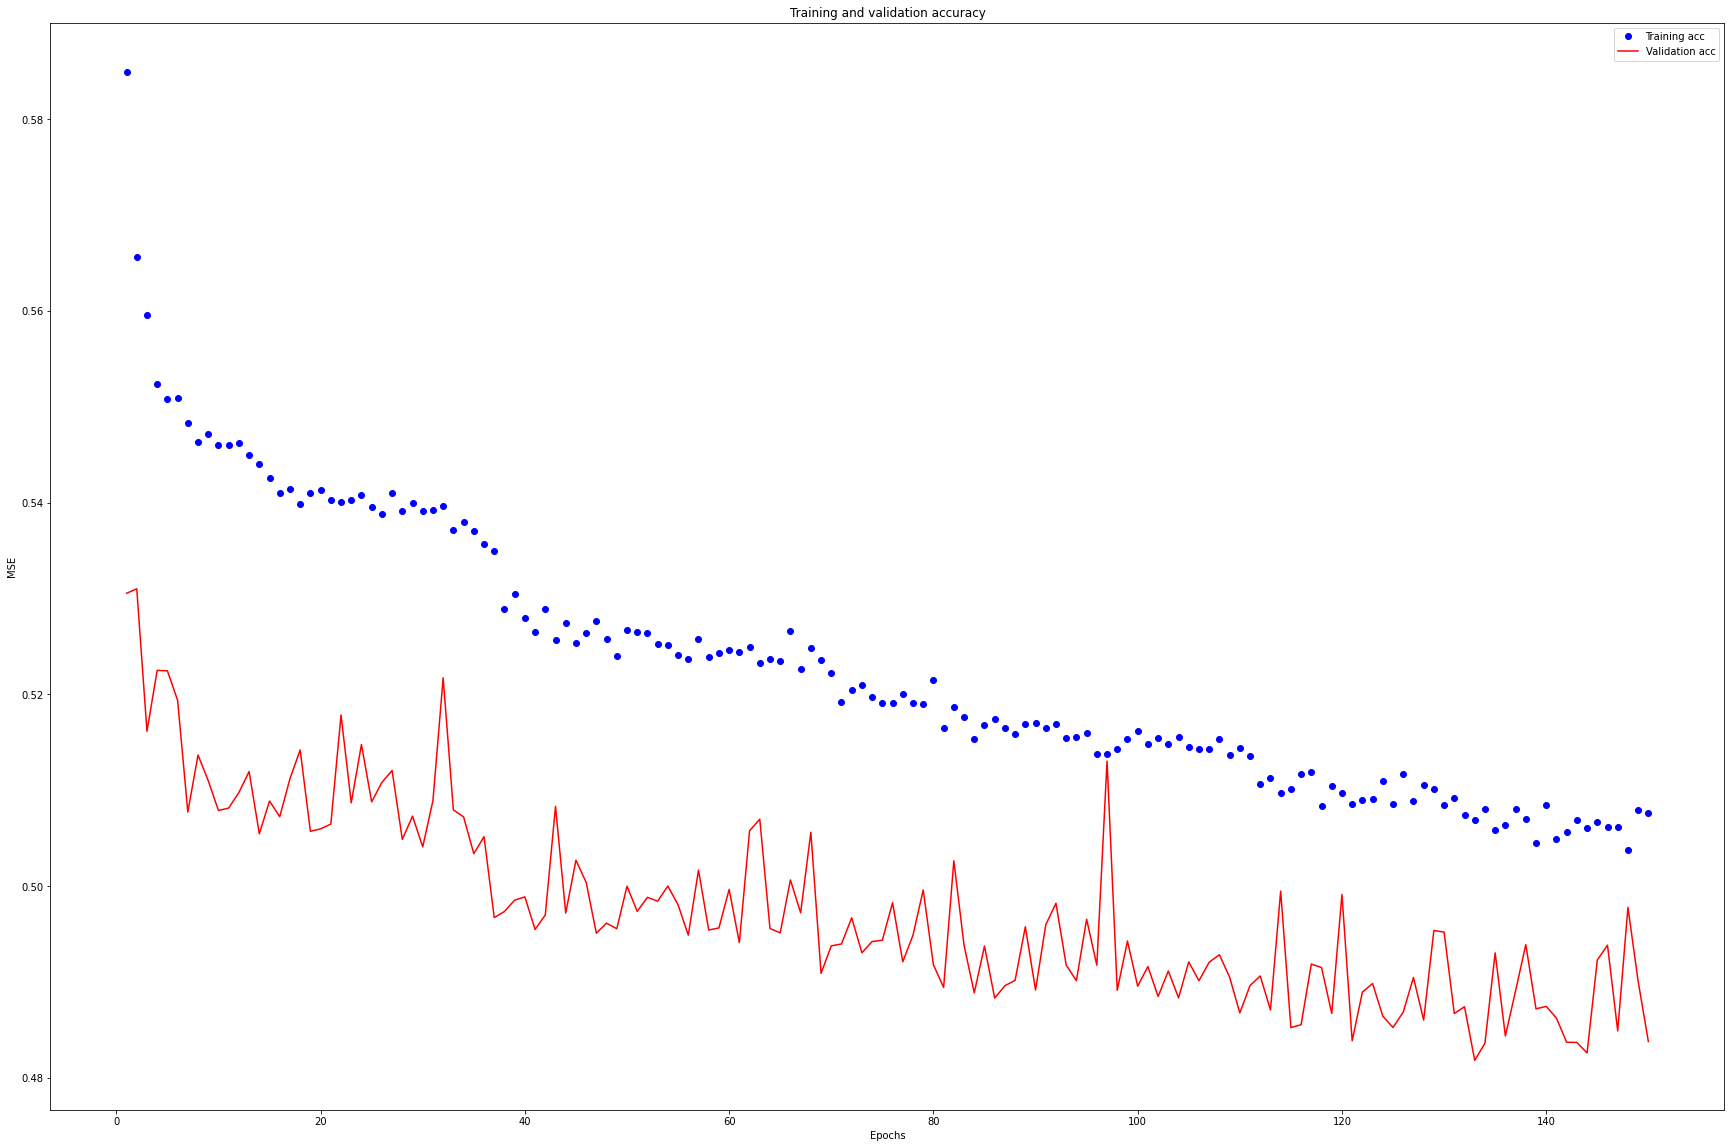

index:  234 actual y:  [0.87906246] predicted y:  [1.1163481 1.1121722 1.112705  1.1133364 1.1129149 1.1151164 1.1151197
 1.1110995 1.115039  1.1114277 1.111284  1.1123202 1.108787  1.1140226
 1.1083821 1.1089526 1.1101865 1.1110024 1.1089451 1.1121857 1.1131525
 1.1111566 1.1110477 1.1082076 1.09047   1.1128635 1.1115011 1.1153991
 1.1078664 1.1117396 1.1105282 1.1128783 1.1145687 1.1117976 1.1137097
 1.1164258 1.1137326 1.1100981 1.1151083 1.1146137 1.1113546 1.1119361
 1.1148748 1.1139677 1.1112062 1.1092306 1.1159364 1.111105  1.1102692
 1.1118042 1.1107881 1.1084367 1.1102375 1.1167843 1.111561  1.1136478
 1.1108781 1.1101971 1.1078162 1.1092367 1.1119275 1.1076461 1.1161815
 1.1139076 1.1154023 1.1128033 1.1109797 1.1119032 1.1141405 1.1102967]
index:  456 actual y:  [-0.17457505] predicted y:  [0.4310632  0.43393934 0.43360543 0.43337274 0.432186   0.4333752
 0.43088573 0.43178397 0.43297333 0.43355578 0.43390548 0.4349411
 0.43324637 0.4340026  0.43390906 0.4342898  0.43342748 

In [376]:
# tf.model.add(tf.keras.layers.Dense(input_dim=6, units=70, kernel_initializer='glorot_normal', activation='relu', input_shape = (x_train.shape[1],)))
# # tf.model.add(tf.keras.layers.Dropout(drop_rate))
# # tf.model.add(tf.keras.layers.Dense(units=70, kernel_initializer='glorot_normal', activation='relu'))
# # tf.model.add(tf.keras.layers.Dropout(drop_rate))
# tf.model.add(tf.keras.layers.Dense(units=100, kernel_initializer='glorot_normal', activation='relu'))
# # tf.model.add(tf.keras.layers.Dropout(drop_rate))
# tf.model.add(tf.keras.layers.Dense(units=100, kernel_initializer='glorot_normal', activation='relu'))
# # tf.model.add(tf.keras.layers.Dropout(drop_rate))
# tf.model.compile(loss='mse',
#                  optimizer='rmsprop', metrics=['mae'])
# tf.model.summary()



tf.model = tf.keras.Sequential()

tf.model.add(tf.keras.layers.Dense( units=70, kernel_initializer='glorot_normal', activation='relu', input_shape = (x_train.shape[1],)))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=70, activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=70, activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=70, activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=70, activation='relu'))
tf.model.compile(loss='mse',
                 optimizer='rmsprop', metrics=['mae'])
tf.model.summary()

history = tf.model.fit(x_train, y_train,epochs = training_epochs,batch_size = batch_size,validation_data=(x_test,y_test))

#Validation
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  # ‘bo’는 파란색 점을 의미
plt.plot(epochs, val_loss, 'r', label='Validation loss') # ‘b’는 파란색 실선을 의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.rcParams['figure.figsize'] = (30,20)
plt.legend()

plt.show()

plt.clf() # 그래프를 초기화합니다.
acc = history_dict['mae']
val_acc = history_dict['val_mae']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.show()

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", y_test[random_index],
          "predicted y: ", y_predicted[random_index])

# evaluate test set
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])


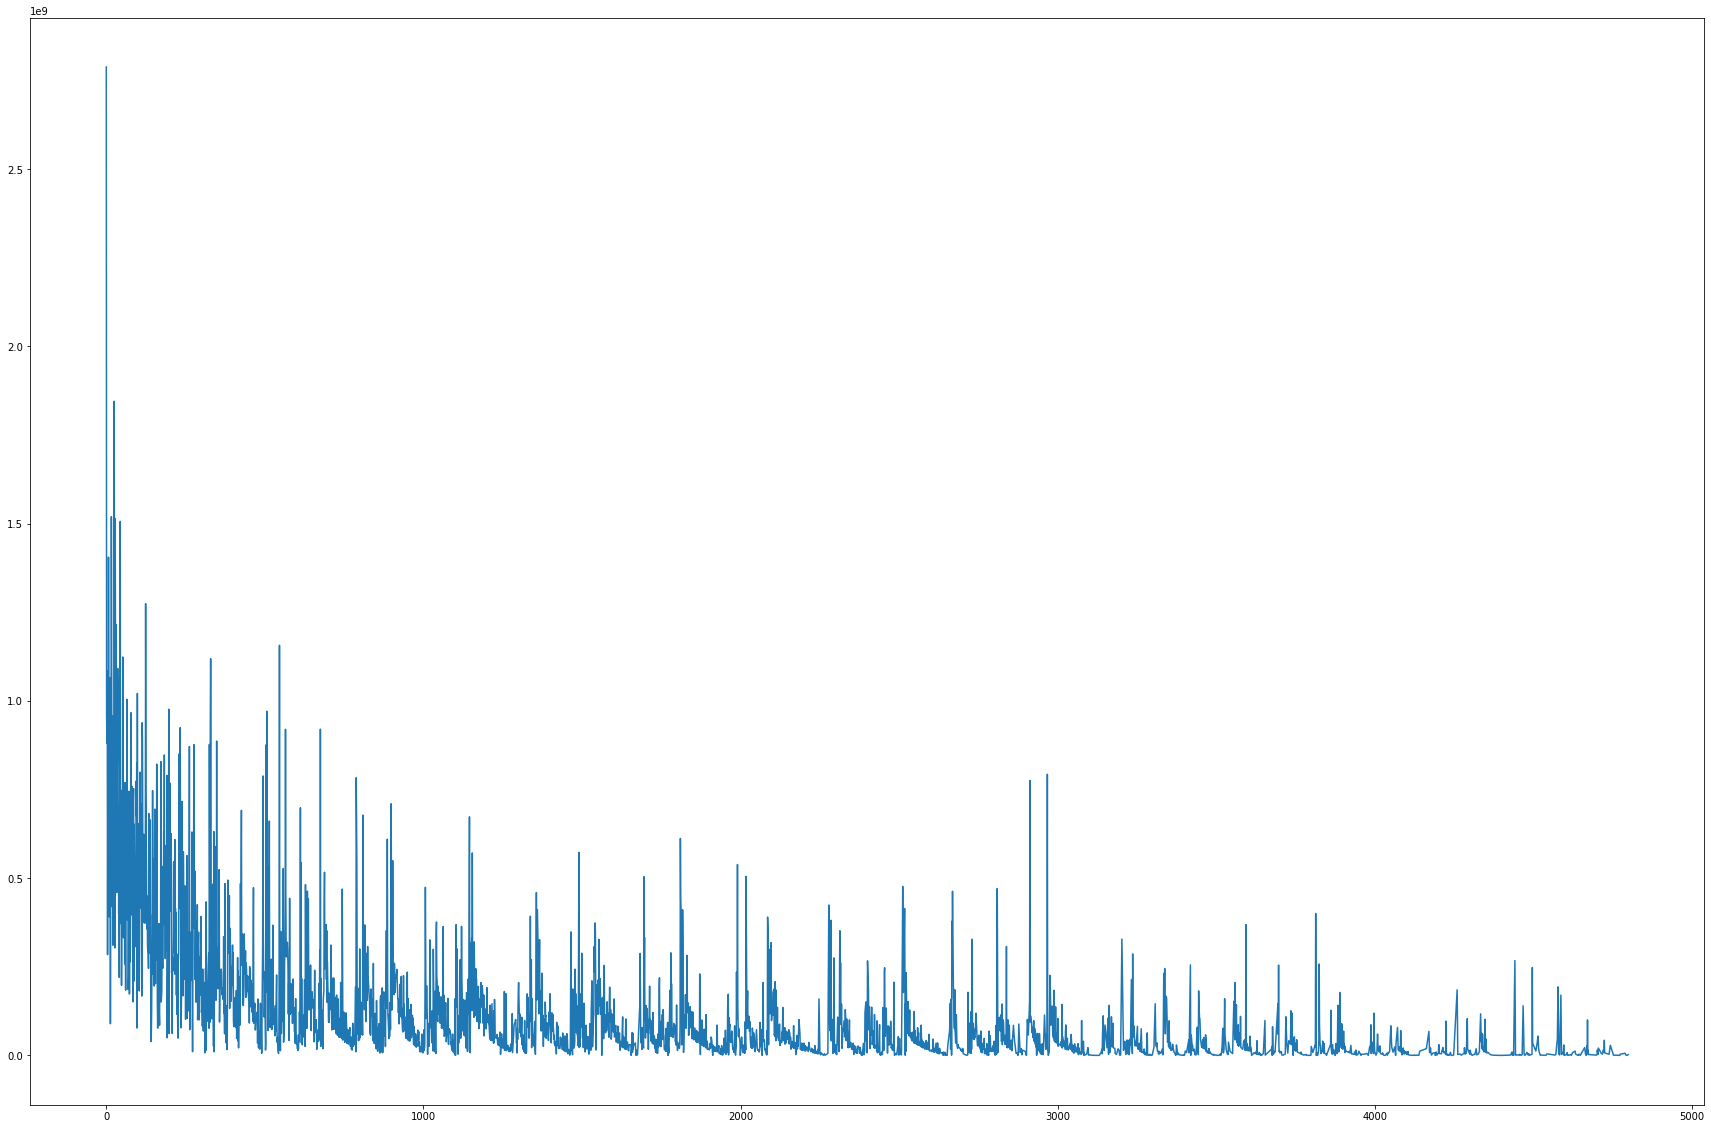

In [397]:
data_with_revenue['revenue'].plot()
#x labels : index
#y labels : revenue

In [450]:
binary_classification = data_with_revenue[["revenue","budget","popularity","vote_average",	"num_of_keywords"] ]

conditionlist = [
                 (binary_classification['revenue'] >= 1.462920e+08) ,
                 (binary_classification['revenue'] >= 5.518472e+07 ) & (binary_classification['revenue'] <1.462920e+08),
                 (binary_classification['revenue'] <= 5.518472e+07 )]
choicelist = [2,1,0]
binary_classification['classification'] = np.select(conditionlist, choicelist, default=0)


binary_classification = binary_classification[["classification","revenue","budget","popularity","vote_average",	"num_of_keywords"] ]
binary_classification


classification     revenue  ...  vote_average  num_of_keywords
0                  2  2787965087  ...           7.2               21
1                  2   961000000  ...           6.9               16
2                  2   880674609  ...           6.3                7
3                  2  1084939099  ...           7.6               21
4                  2   284139100  ...           6.1               16
...              ...         ...  ...           ...              ...
4773               0     3151130  ...           7.4                3
4788               0     6000000  ...           6.2               17
4792               0       99000  ...           7.4               17
4796               0      424760  ...           6.9                9
4798               0     2040920  ...           6.6                5

[3229 rows x 6 columns]

In [389]:
data_with_revenue['revenue'].describe()

count    3.229000e+03
mean     1.212430e+08
std      1.863029e+08
min      5.000000e+00
25%      1.700000e+07
50%      5.518472e+07
75%      1.462920e+08
max      2.787965e+09
Name: revenue, dtype: float64

      classification     revenue  ...  vote_average  num_of_keywords
0                  2  2787965087  ...           7.2               21
1                  2   961000000  ...           6.9               16
2                  2   880674609  ...           6.3                7
3                  2  1084939099  ...           7.6               21
4                  2   284139100  ...           6.1               16
...              ...         ...  ...           ...              ...
4773               0     3151130  ...           7.4                3
4788               0     6000000  ...           6.2               17
4792               0       99000  ...           7.4               17
4796               0      424760  ...           6.9                9
4798               0     2040920  ...           6.6                5

[3229 rows x 6 columns]
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Par

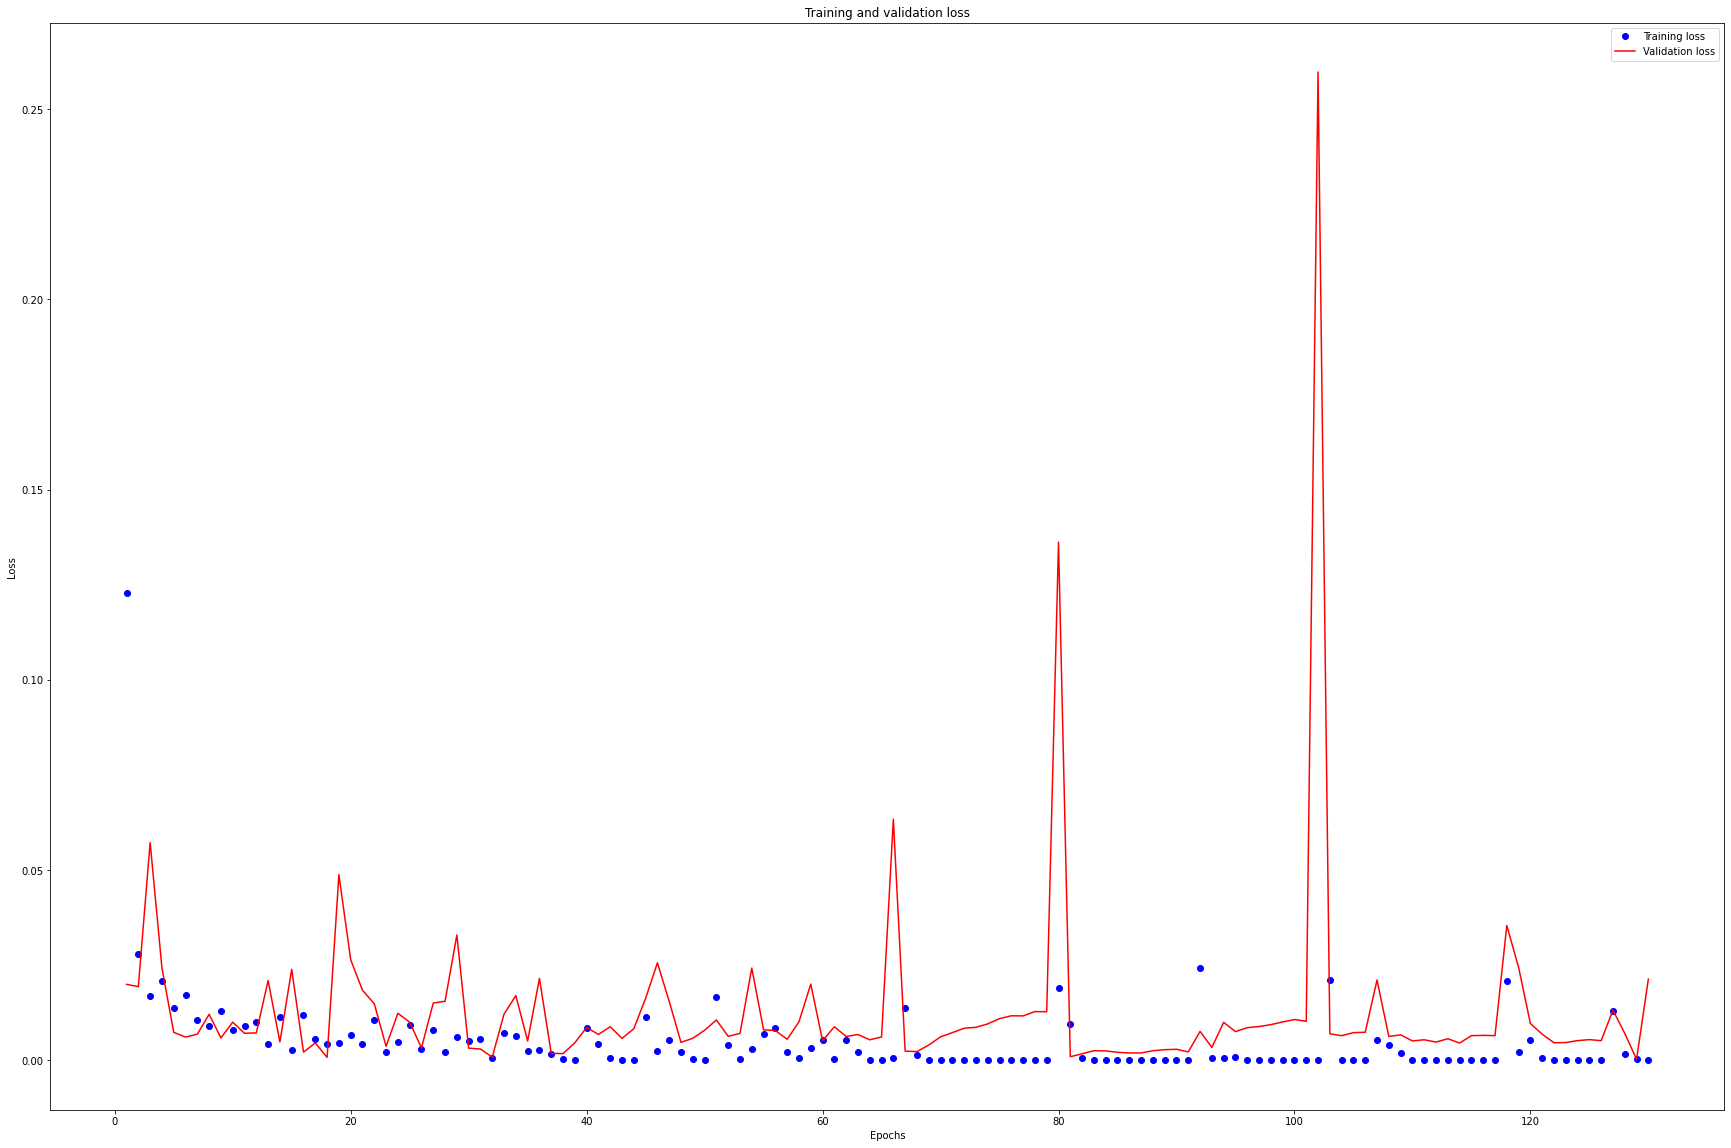

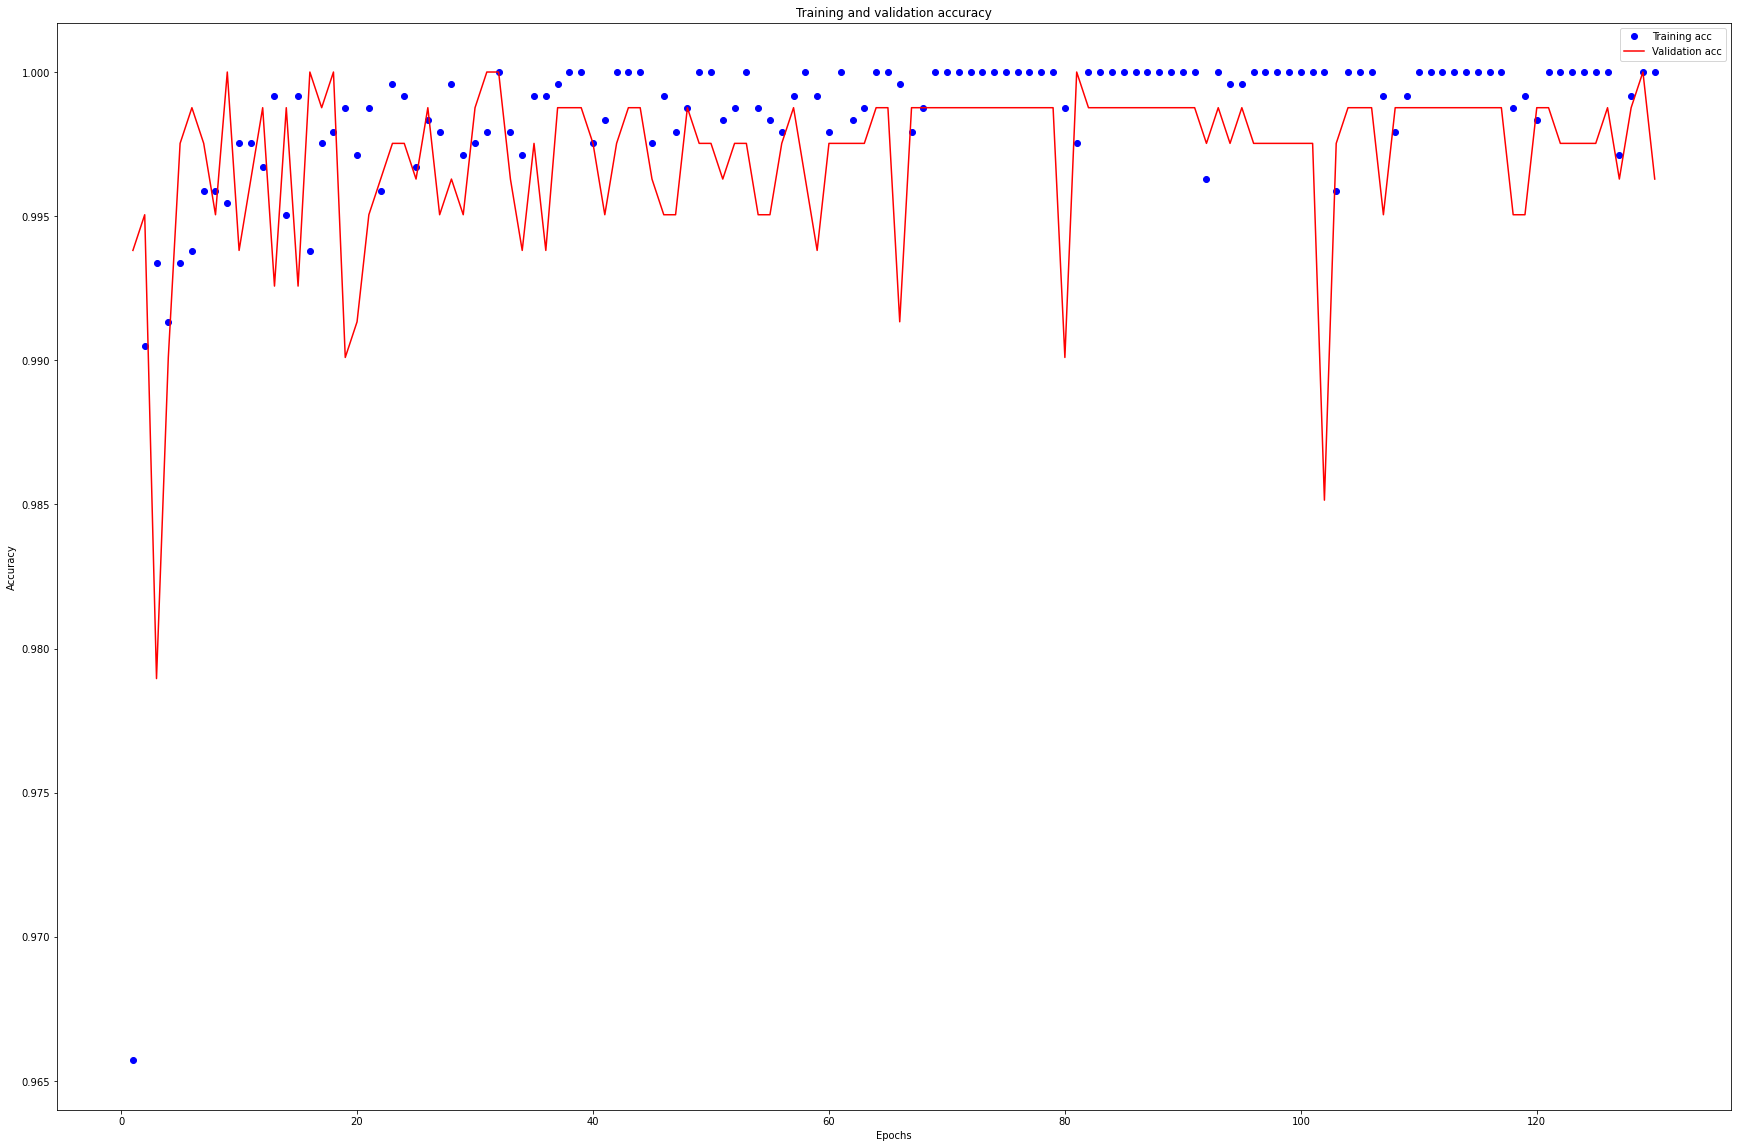

index:  234 actual y:  0 predicted y:  0
index:  456 actual y:  0 predicted y:  0
index:  456 actual y:  0 predicted y:  0
index:  377 actual y:  0 predicted y:  0
index:  589 actual y:  0 predicted y:  0
index:  276 actual y:  1 predicted y:  1
index:  344 actual y:  1 predicted y:  1
index:  550 actual y:  0 predicted y:  0
index:  770 actual y:  0 predicted y:  0
index:  40 actual y:  1 predicted y:  1
26/26 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9963
loss:  0.021356642246246338
accuracy 0.9962871074676514


In [453]:
#코로나 바이러스 분석
import numpy as np
import random
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

random.seed(777)  # for reproducibility

#하이퍼 파라미터 설정
learning_rate = 0.0005
batch_size = 3
training_epochs = 130
nb_classes = 3
drop_rate = 0.005

data1 = binary_classification
print(data1)
standardScaler = StandardScaler()
standardScaler.fit(data1)
data1[:] = standardScaler.transform(data1[:])
data1

#데이터 슬라이싱 
x = data1.iloc[:,1:5]
y = data1[['classification']]
#Train Data와 Test Data 나누기
x_train, x_test, y_train, y_test = train_test_split(x,y) 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

#형변환
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

tf.model = tf.keras.Sequential()

tf.model.add(tf.keras.layers.Dense(input_dim=4, units=70, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=70, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=70, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=70, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, kernel_initializer='glorot_normal', activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_train, y_train,epochs = training_epochs,batch_size = batch_size,validation_data=(x_test,y_test))

#Validation
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  # ‘bo’는 파란색 점을 의미
plt.plot(epochs, val_loss, 'r', label='Validation loss') # ‘b’는 파란색 실선을 의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.rcParams['figure.figsize'] = (30,20)
plt.legend()

plt.show()

plt.clf() # 그래프를 초기화합니다.
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

# evaluate test set
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])


#이전꺼

#scatter plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e8634b110>,
      dtype=object)

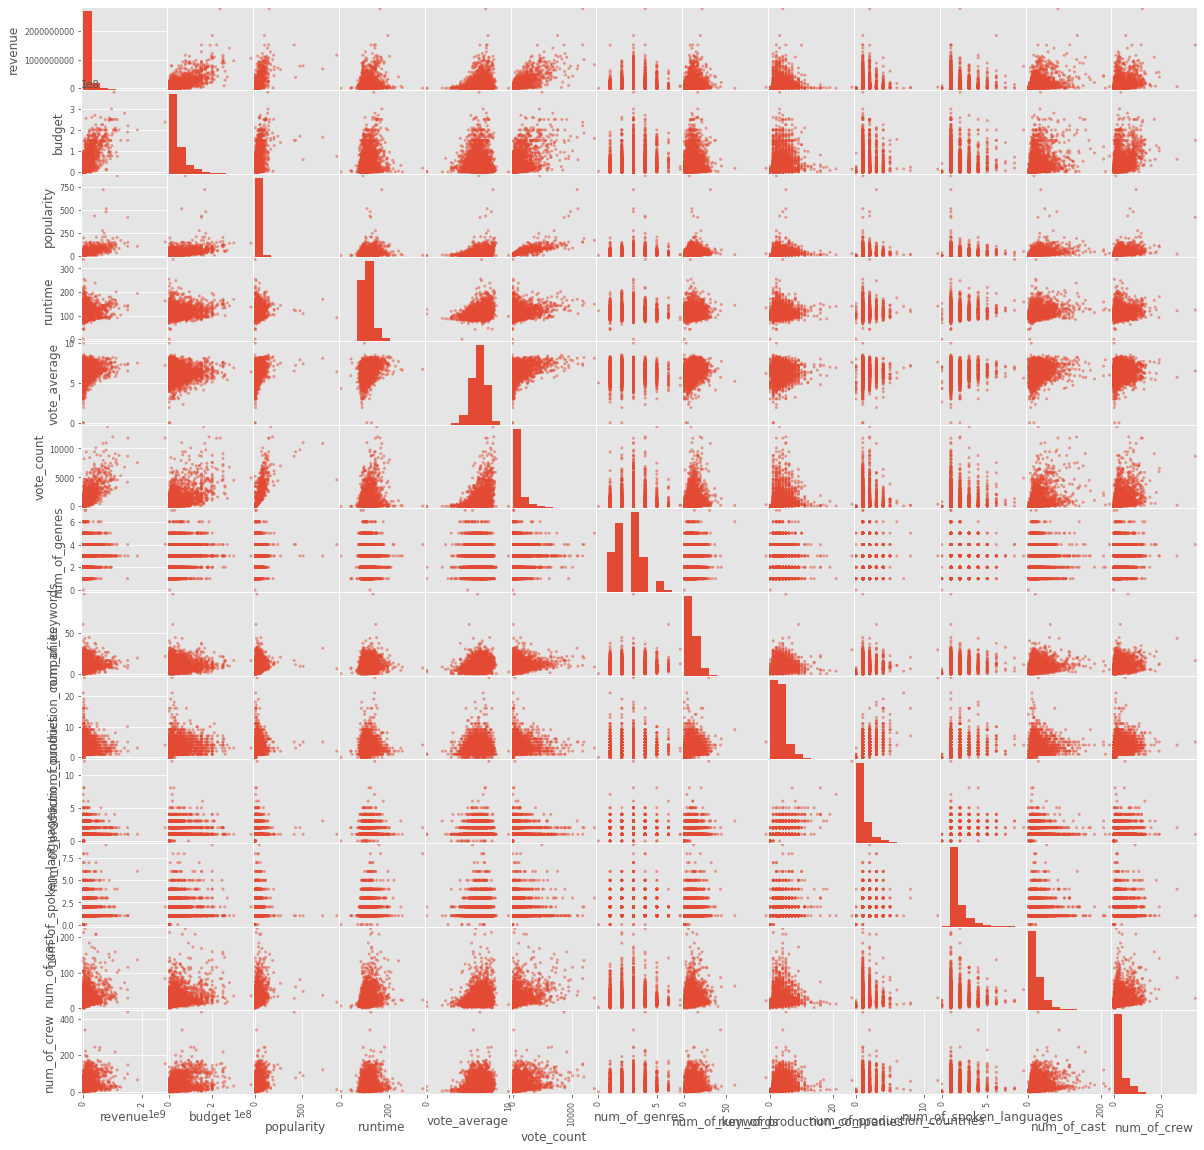

In [ ]:
scatter_matrix(data_continuous_before_norm, figsize = (20,20))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e80cc78d0>,
      dtype=object)

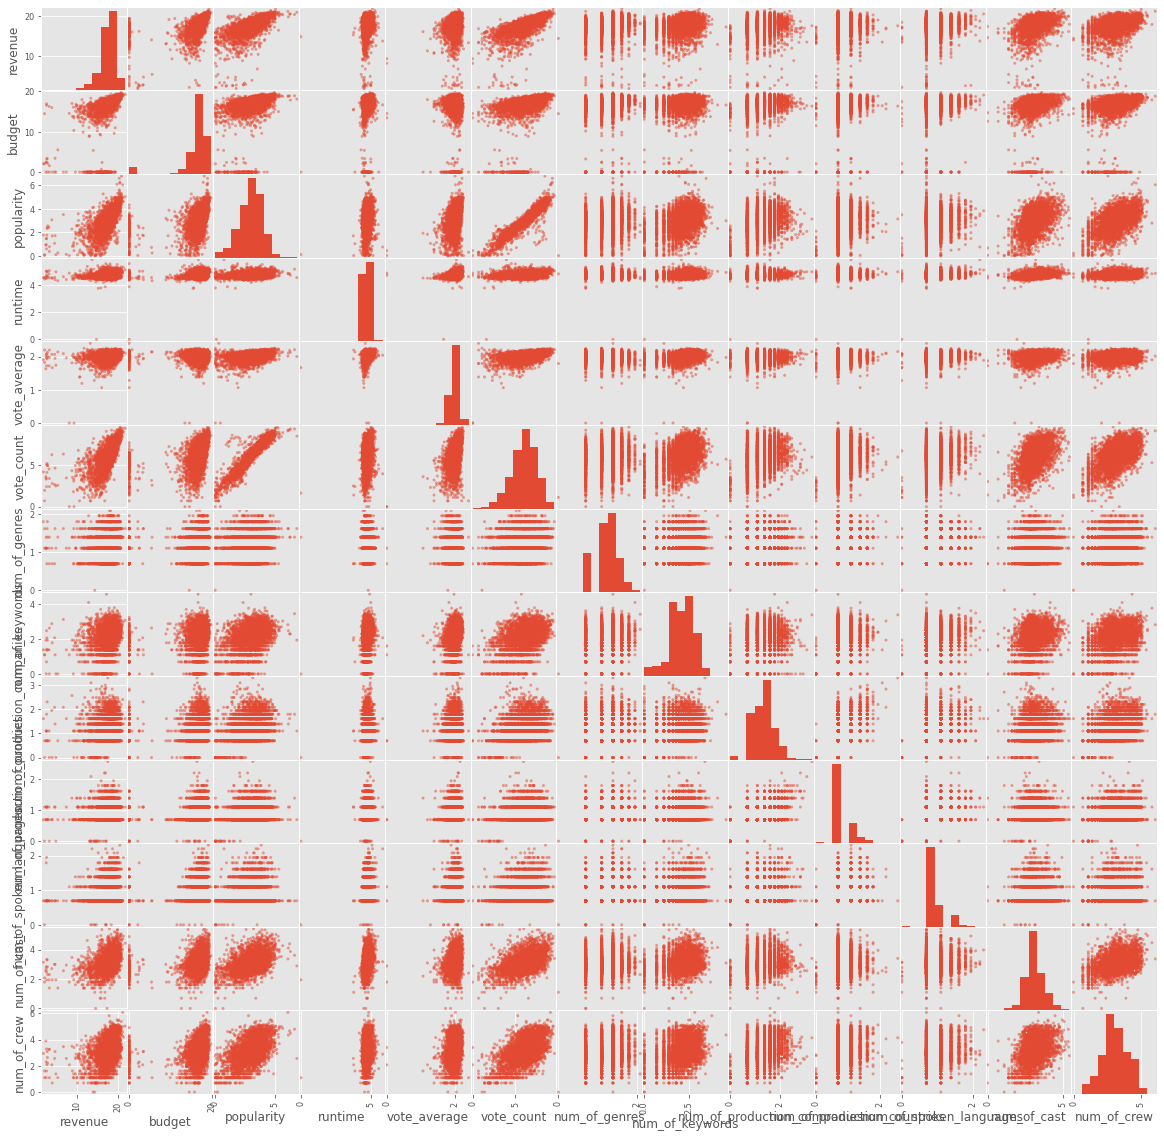

In [ ]:
scatter_matrix(np.log1p(data_continuous_before_norm), figsize = (20,20))

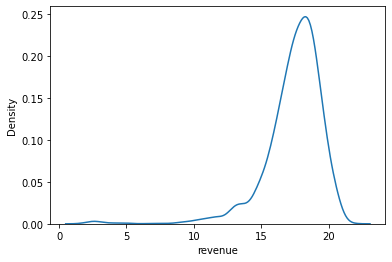

In [ ]:
ax = sns.kdeplot(np.log1p(data_continuous_before_norm["revenue"]))
# ax = sns.kdeplot(data_continuous_before_norm["revenue"])
# ax.set_ylim(0,0.00000001)
plt.show()

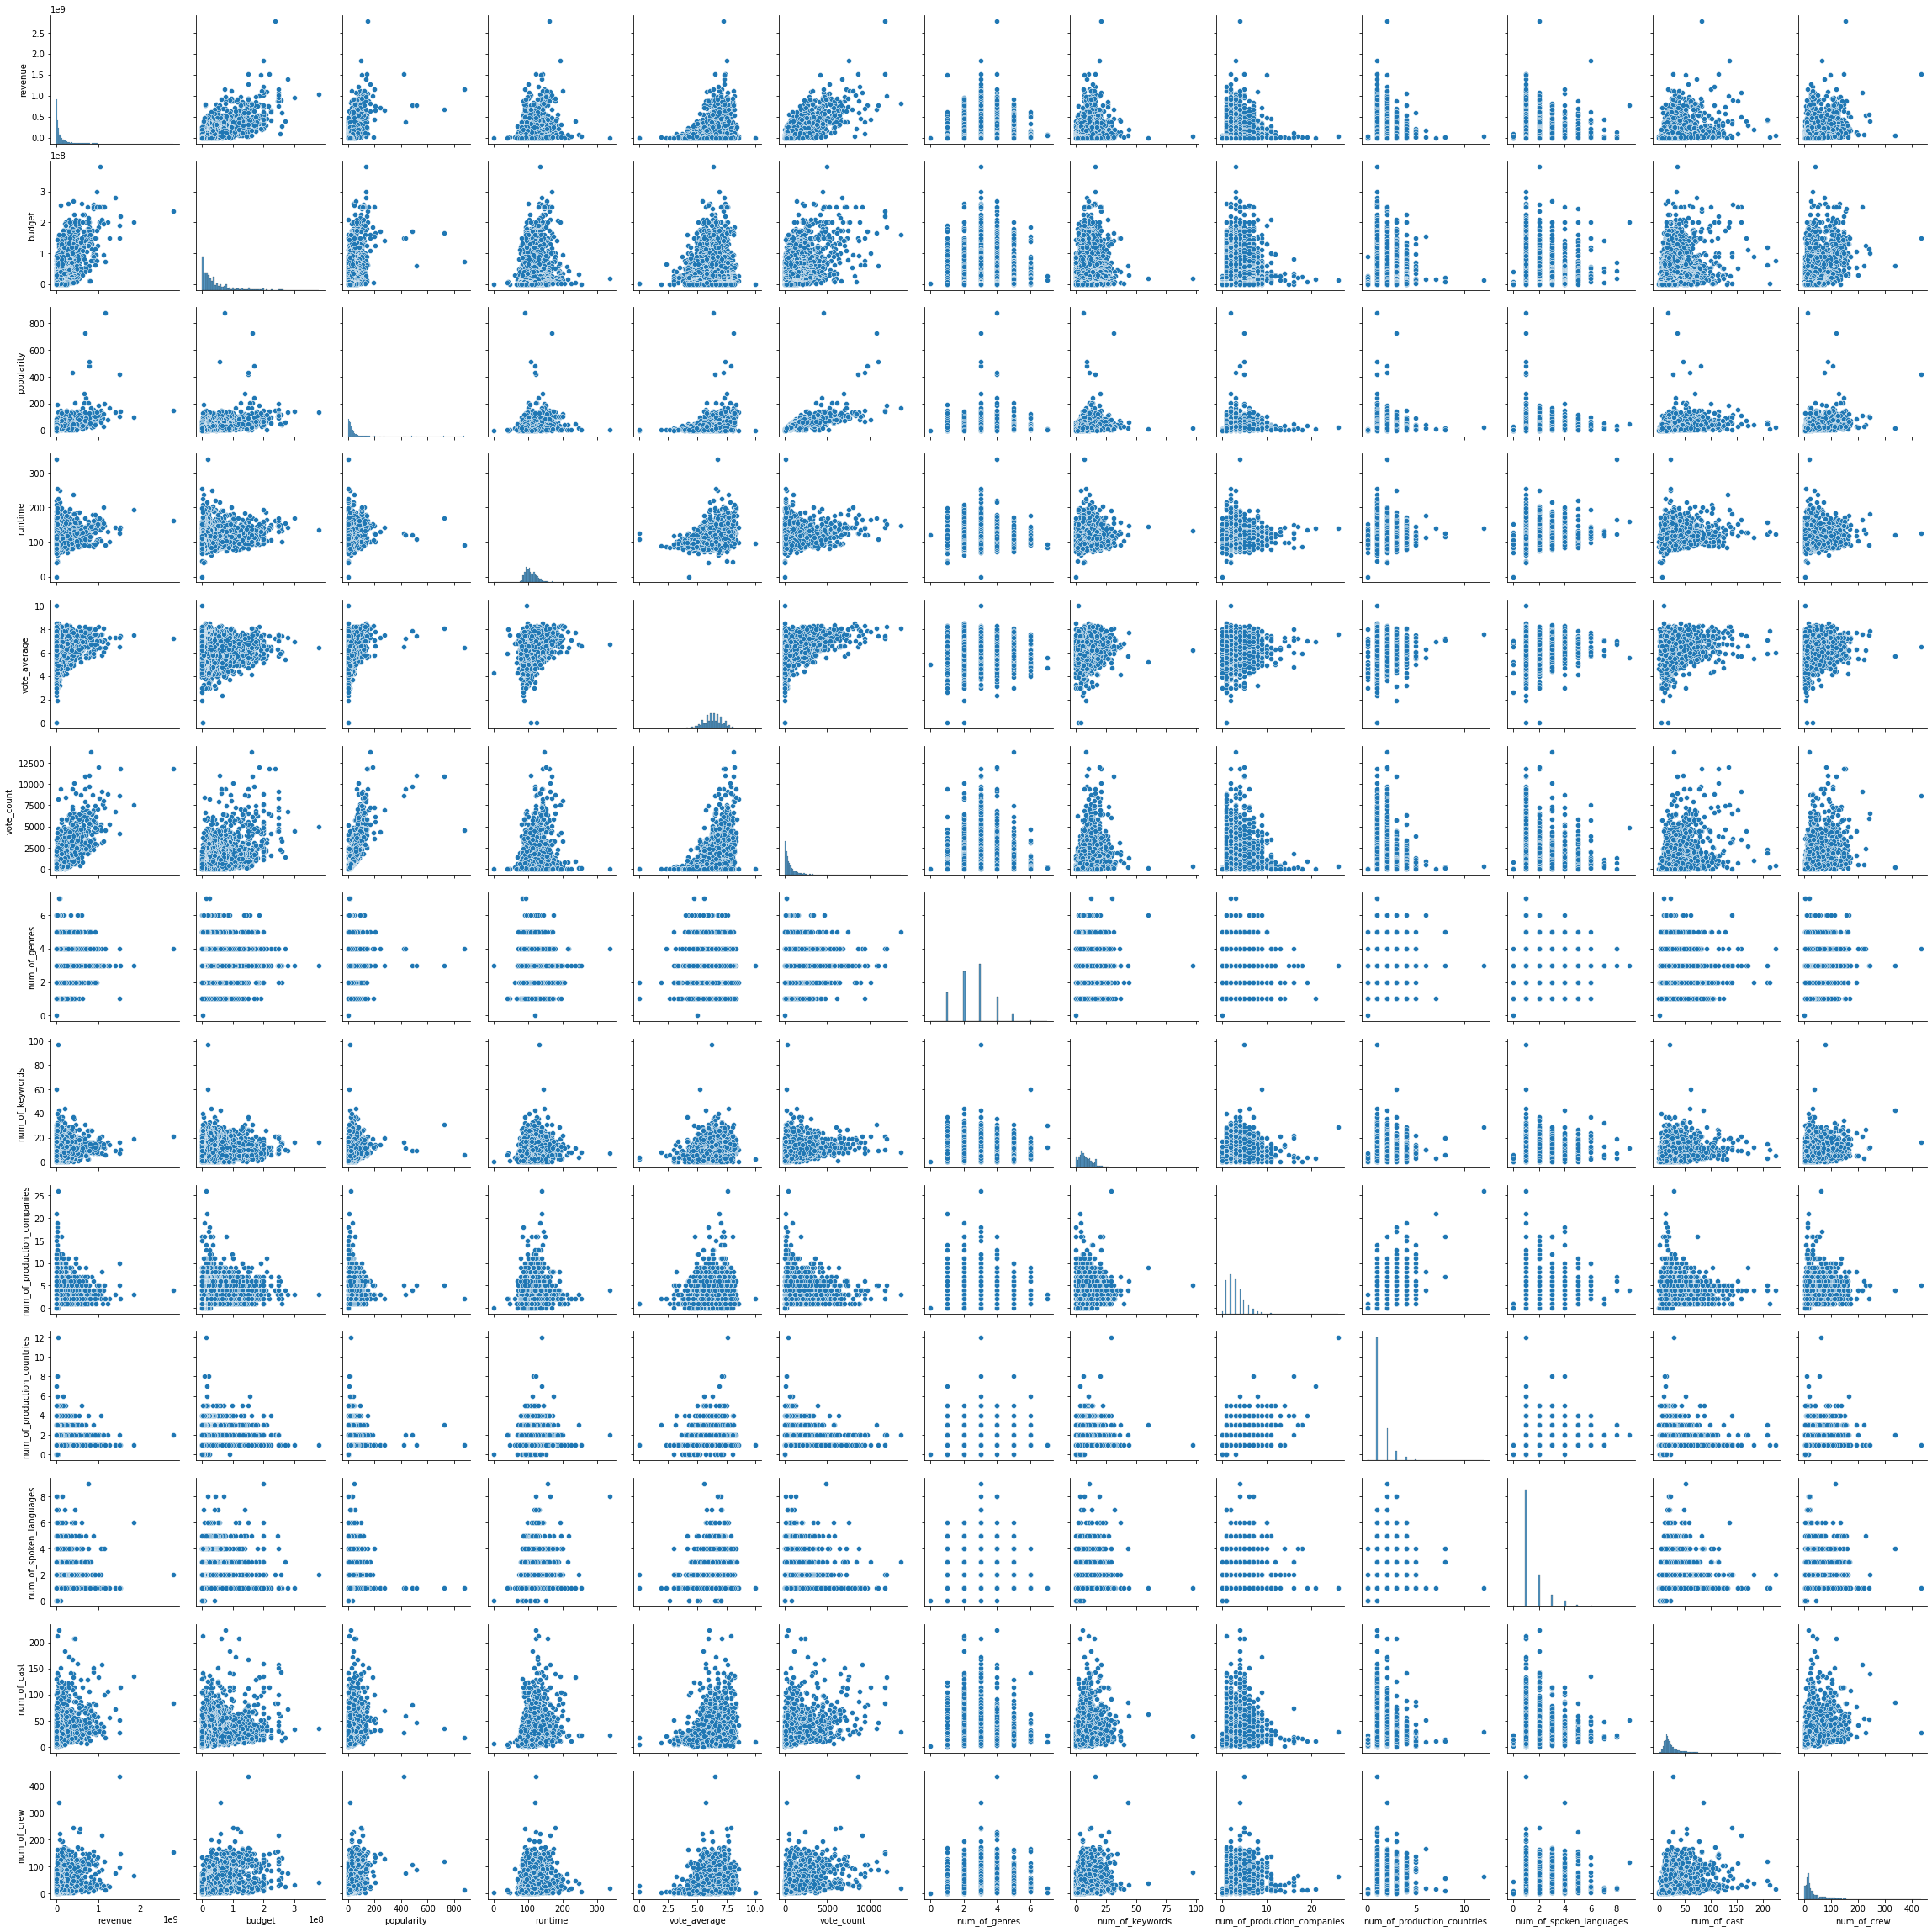

In [ ]:
sns.pairplot(data_continuous_before_norm)


plt.show()


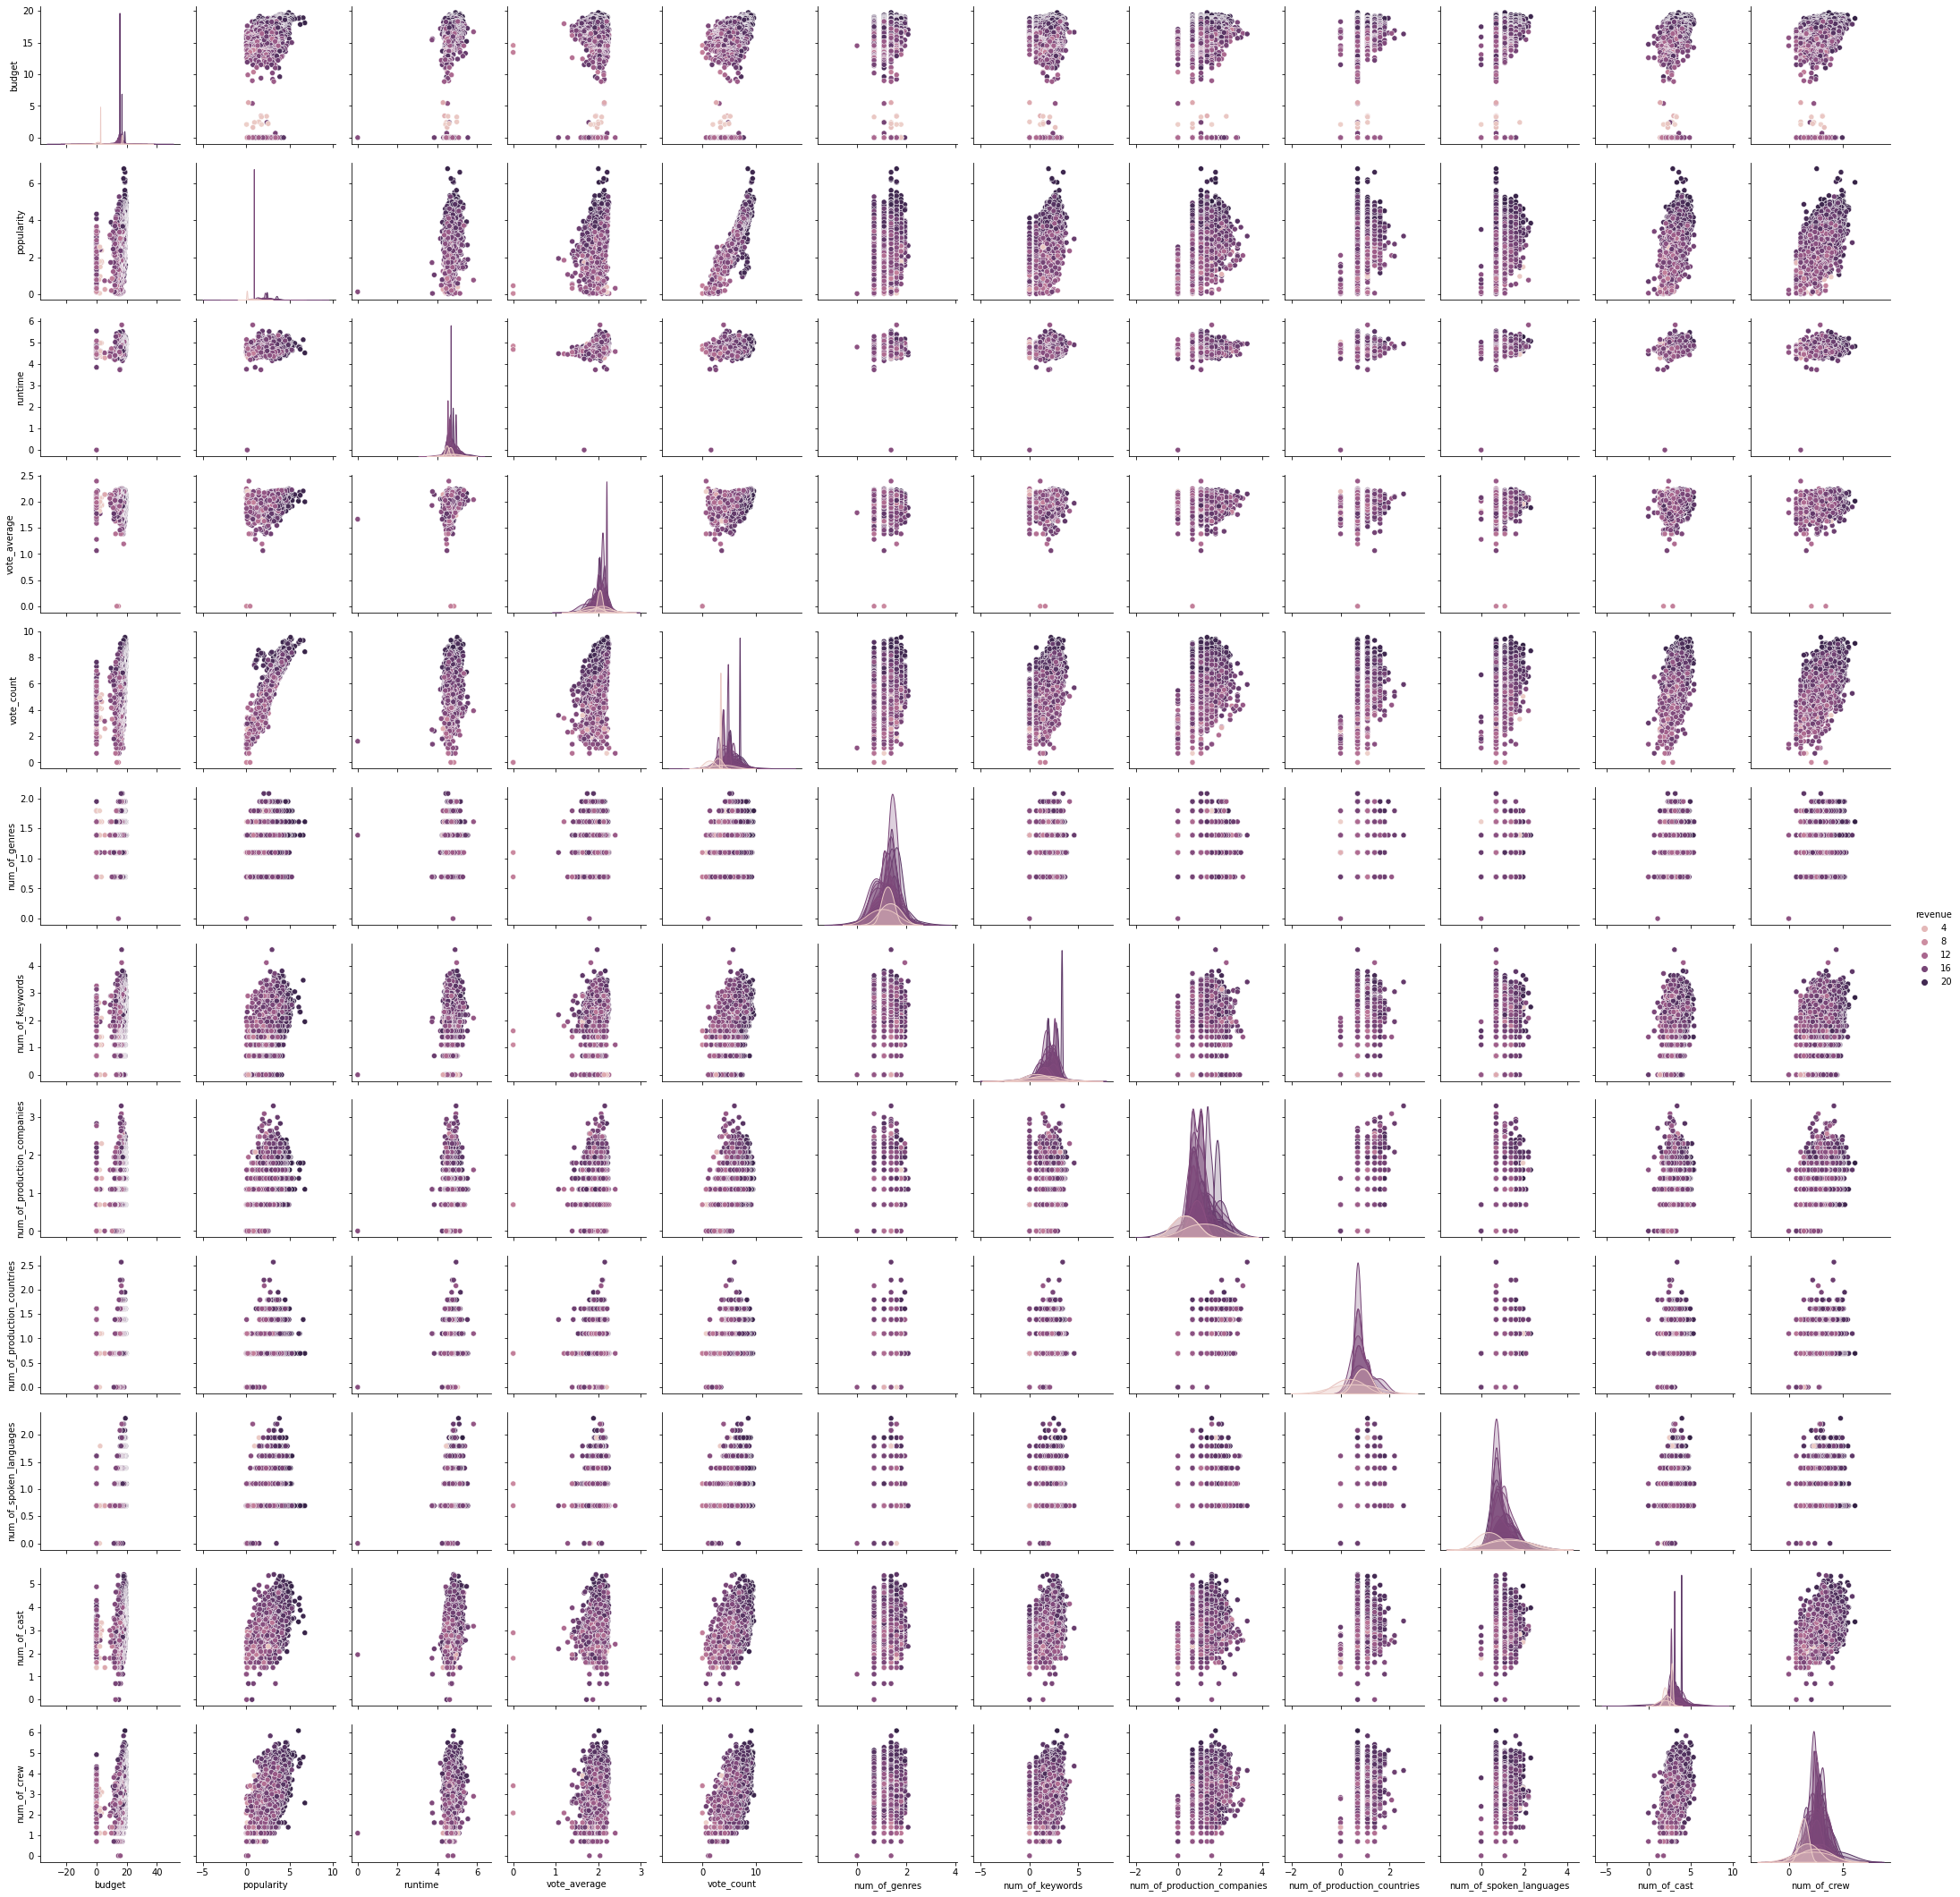

In [ ]:
sns.pairplot(np.log1p(data_continuous_before_norm), hue="revenue")


plt.show()


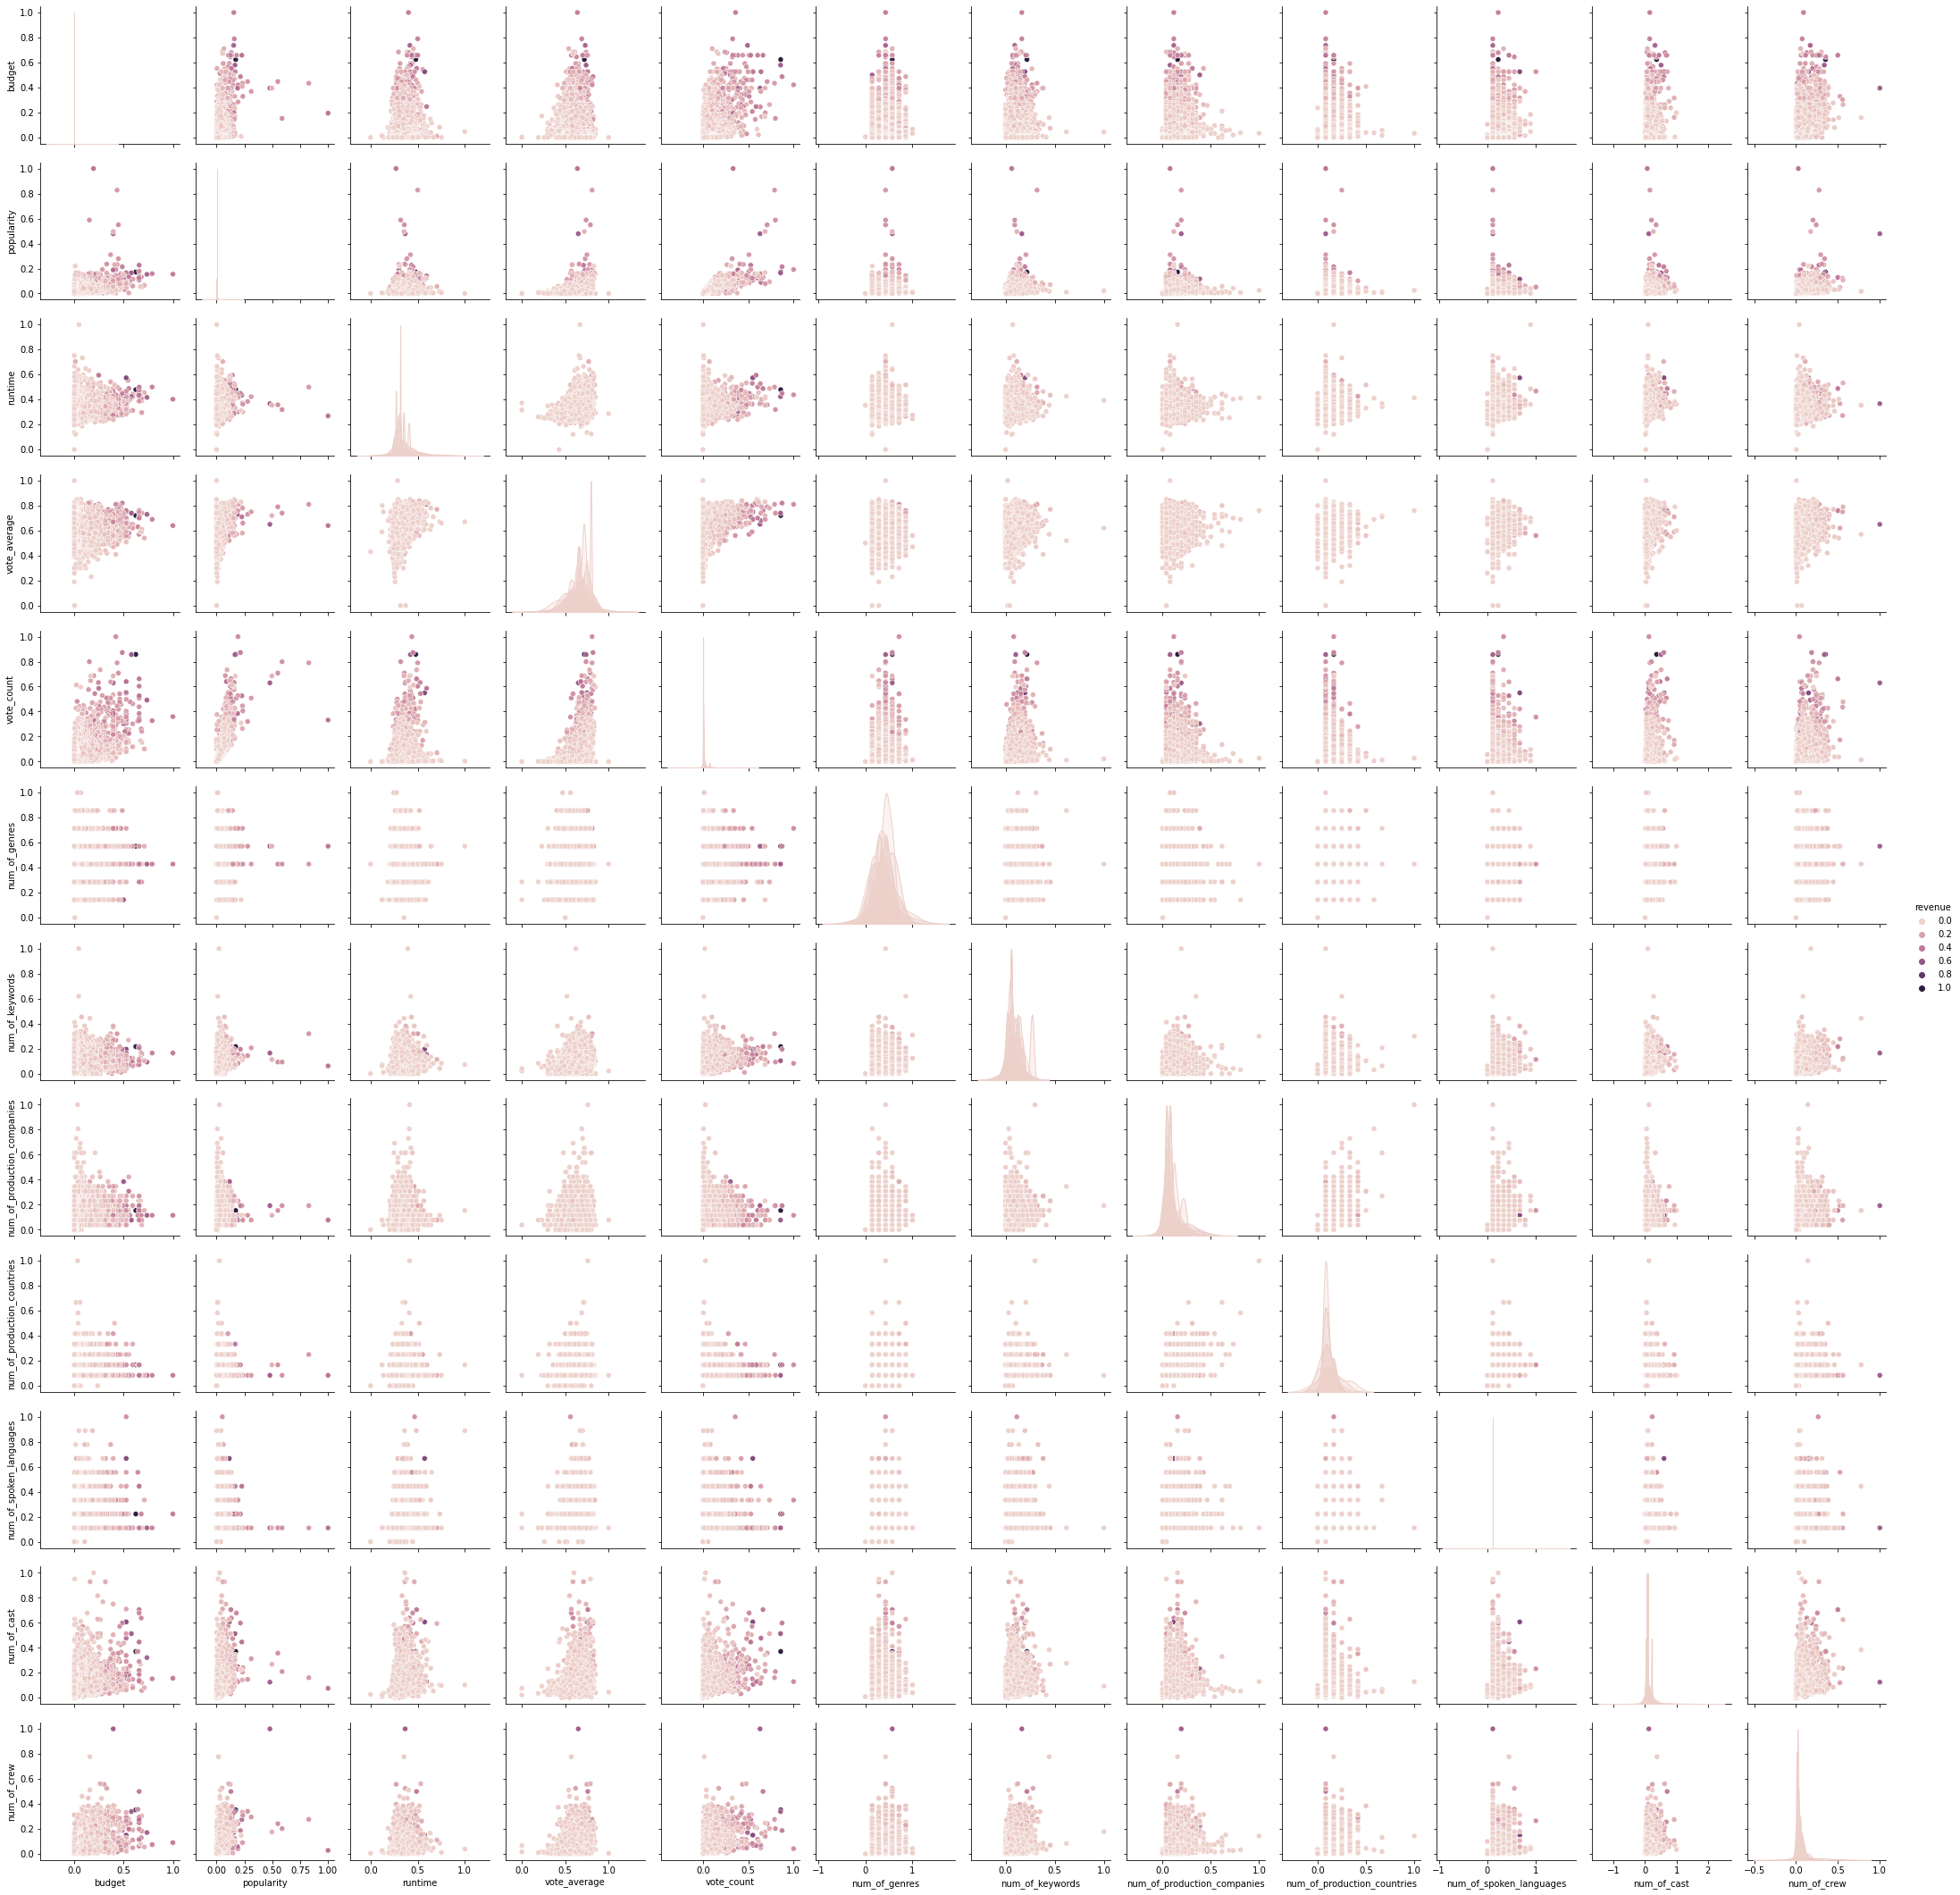

In [ ]:
sns.pairplot(data_continuous, hue="revenue")


plt.show()
